In [11]:
from matplotlib import pyplot as plt
import seaborn as sns

In [16]:
from data_processing import get_data, drop_other_types, find_clusters

ImportError: cannot import name 'find_clusters' from 'data_processing' (d:\Repozytoria\Projekt_Przetwarzanie_Danych\data_processing.py)

In [8]:
df = get_data('./data/SZP-2021-09-03.csv')

Amount of invalid data: 2


# 5. Exploratory Data Analysis (EDA)

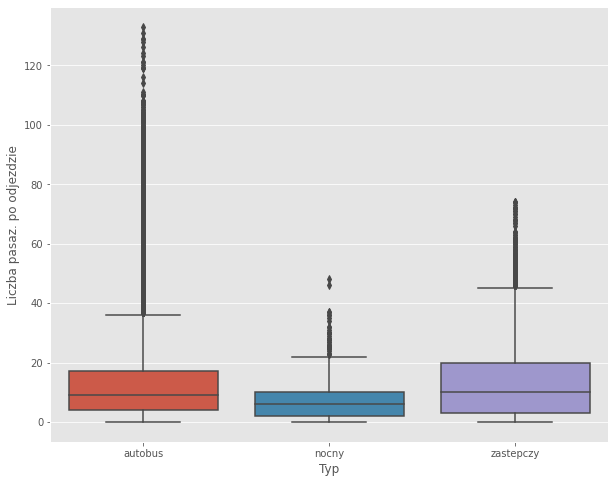

In [13]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(
    y='Liczba pasaz. po odjezdzie',
    x='Typ',
    data=df
)

<Figure size 432x288 with 0 Axes>

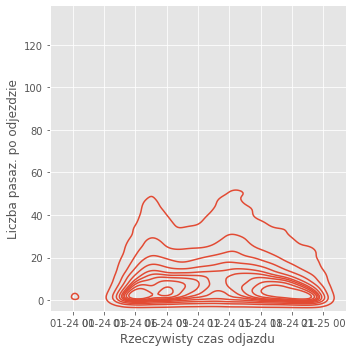

In [14]:
plt.figure()
ax = sns.displot(
    df,
    x='Rzeczywisty czas odjazdu',
    y='Liczba pasaz. po odjezdzie',
    kind='kde'
)

<Figure size 432x288 with 0 Axes>

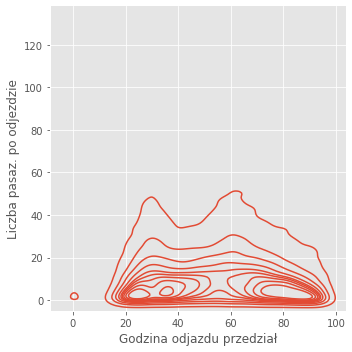

In [15]:
plt.figure()
ax = sns.displot(
    df,
    x='Godzina odjazdu przedział',
    y='Liczba pasaz. po odjezdzie',
    kind='kde'
)

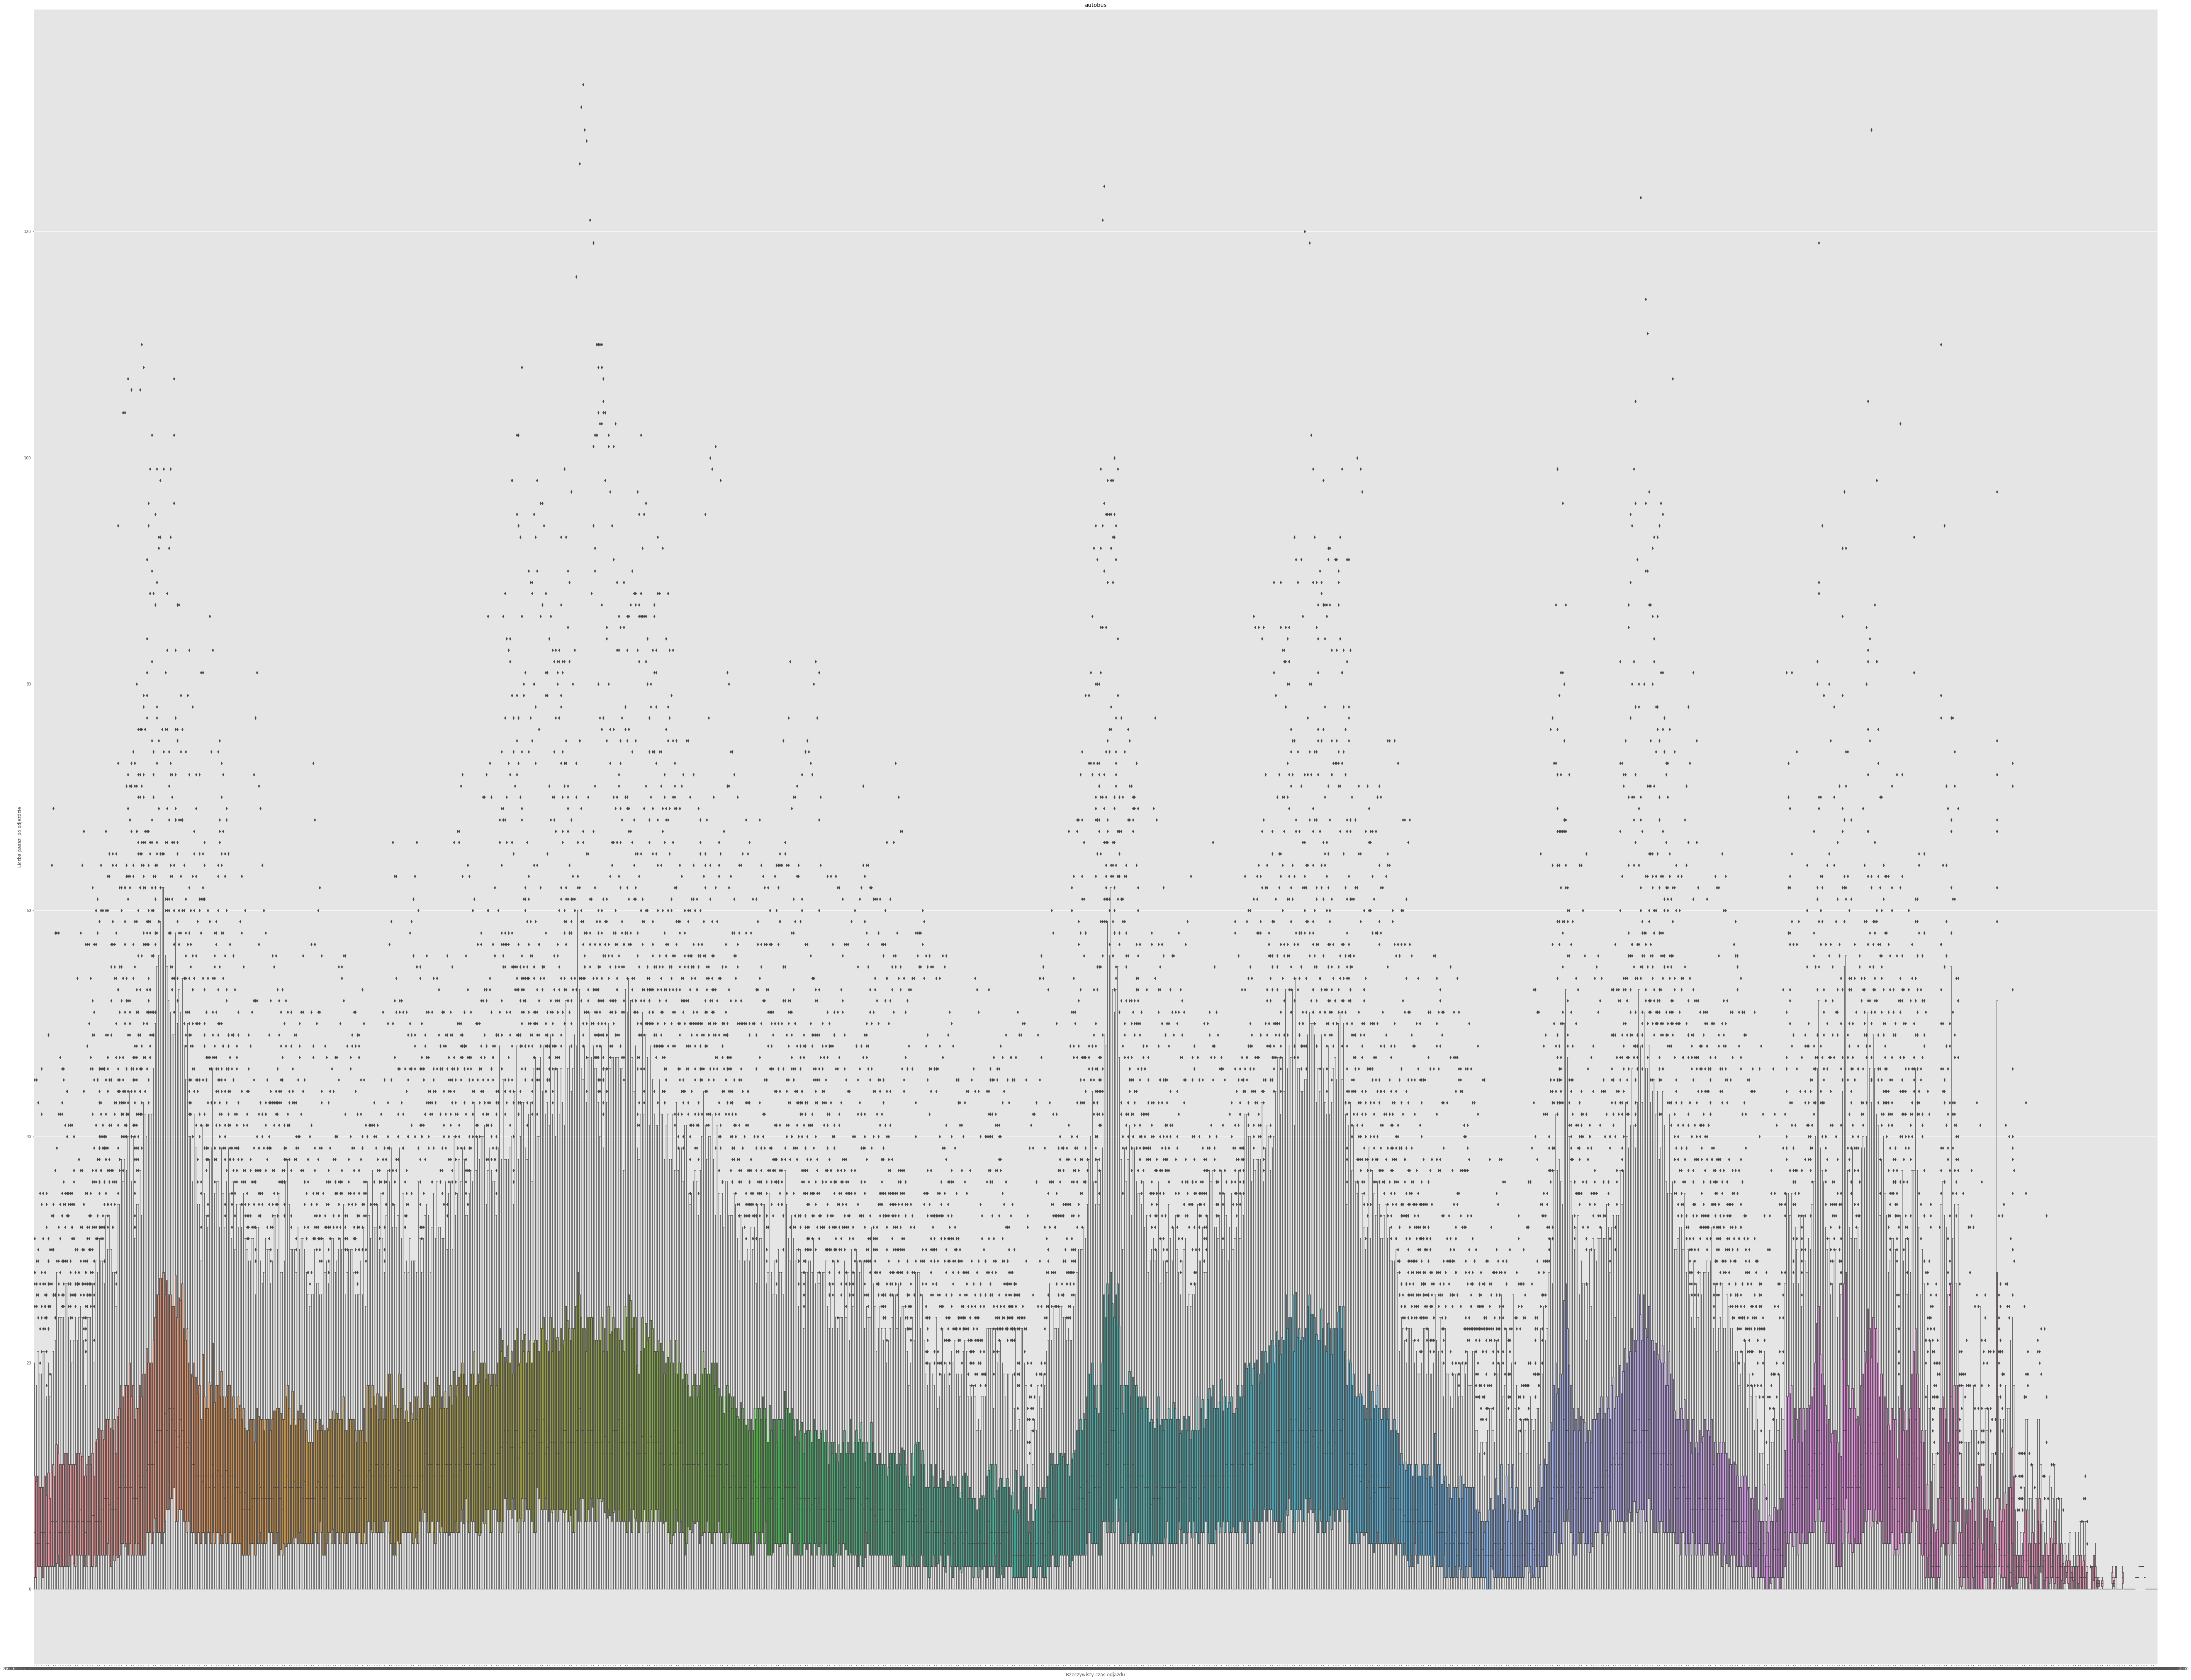

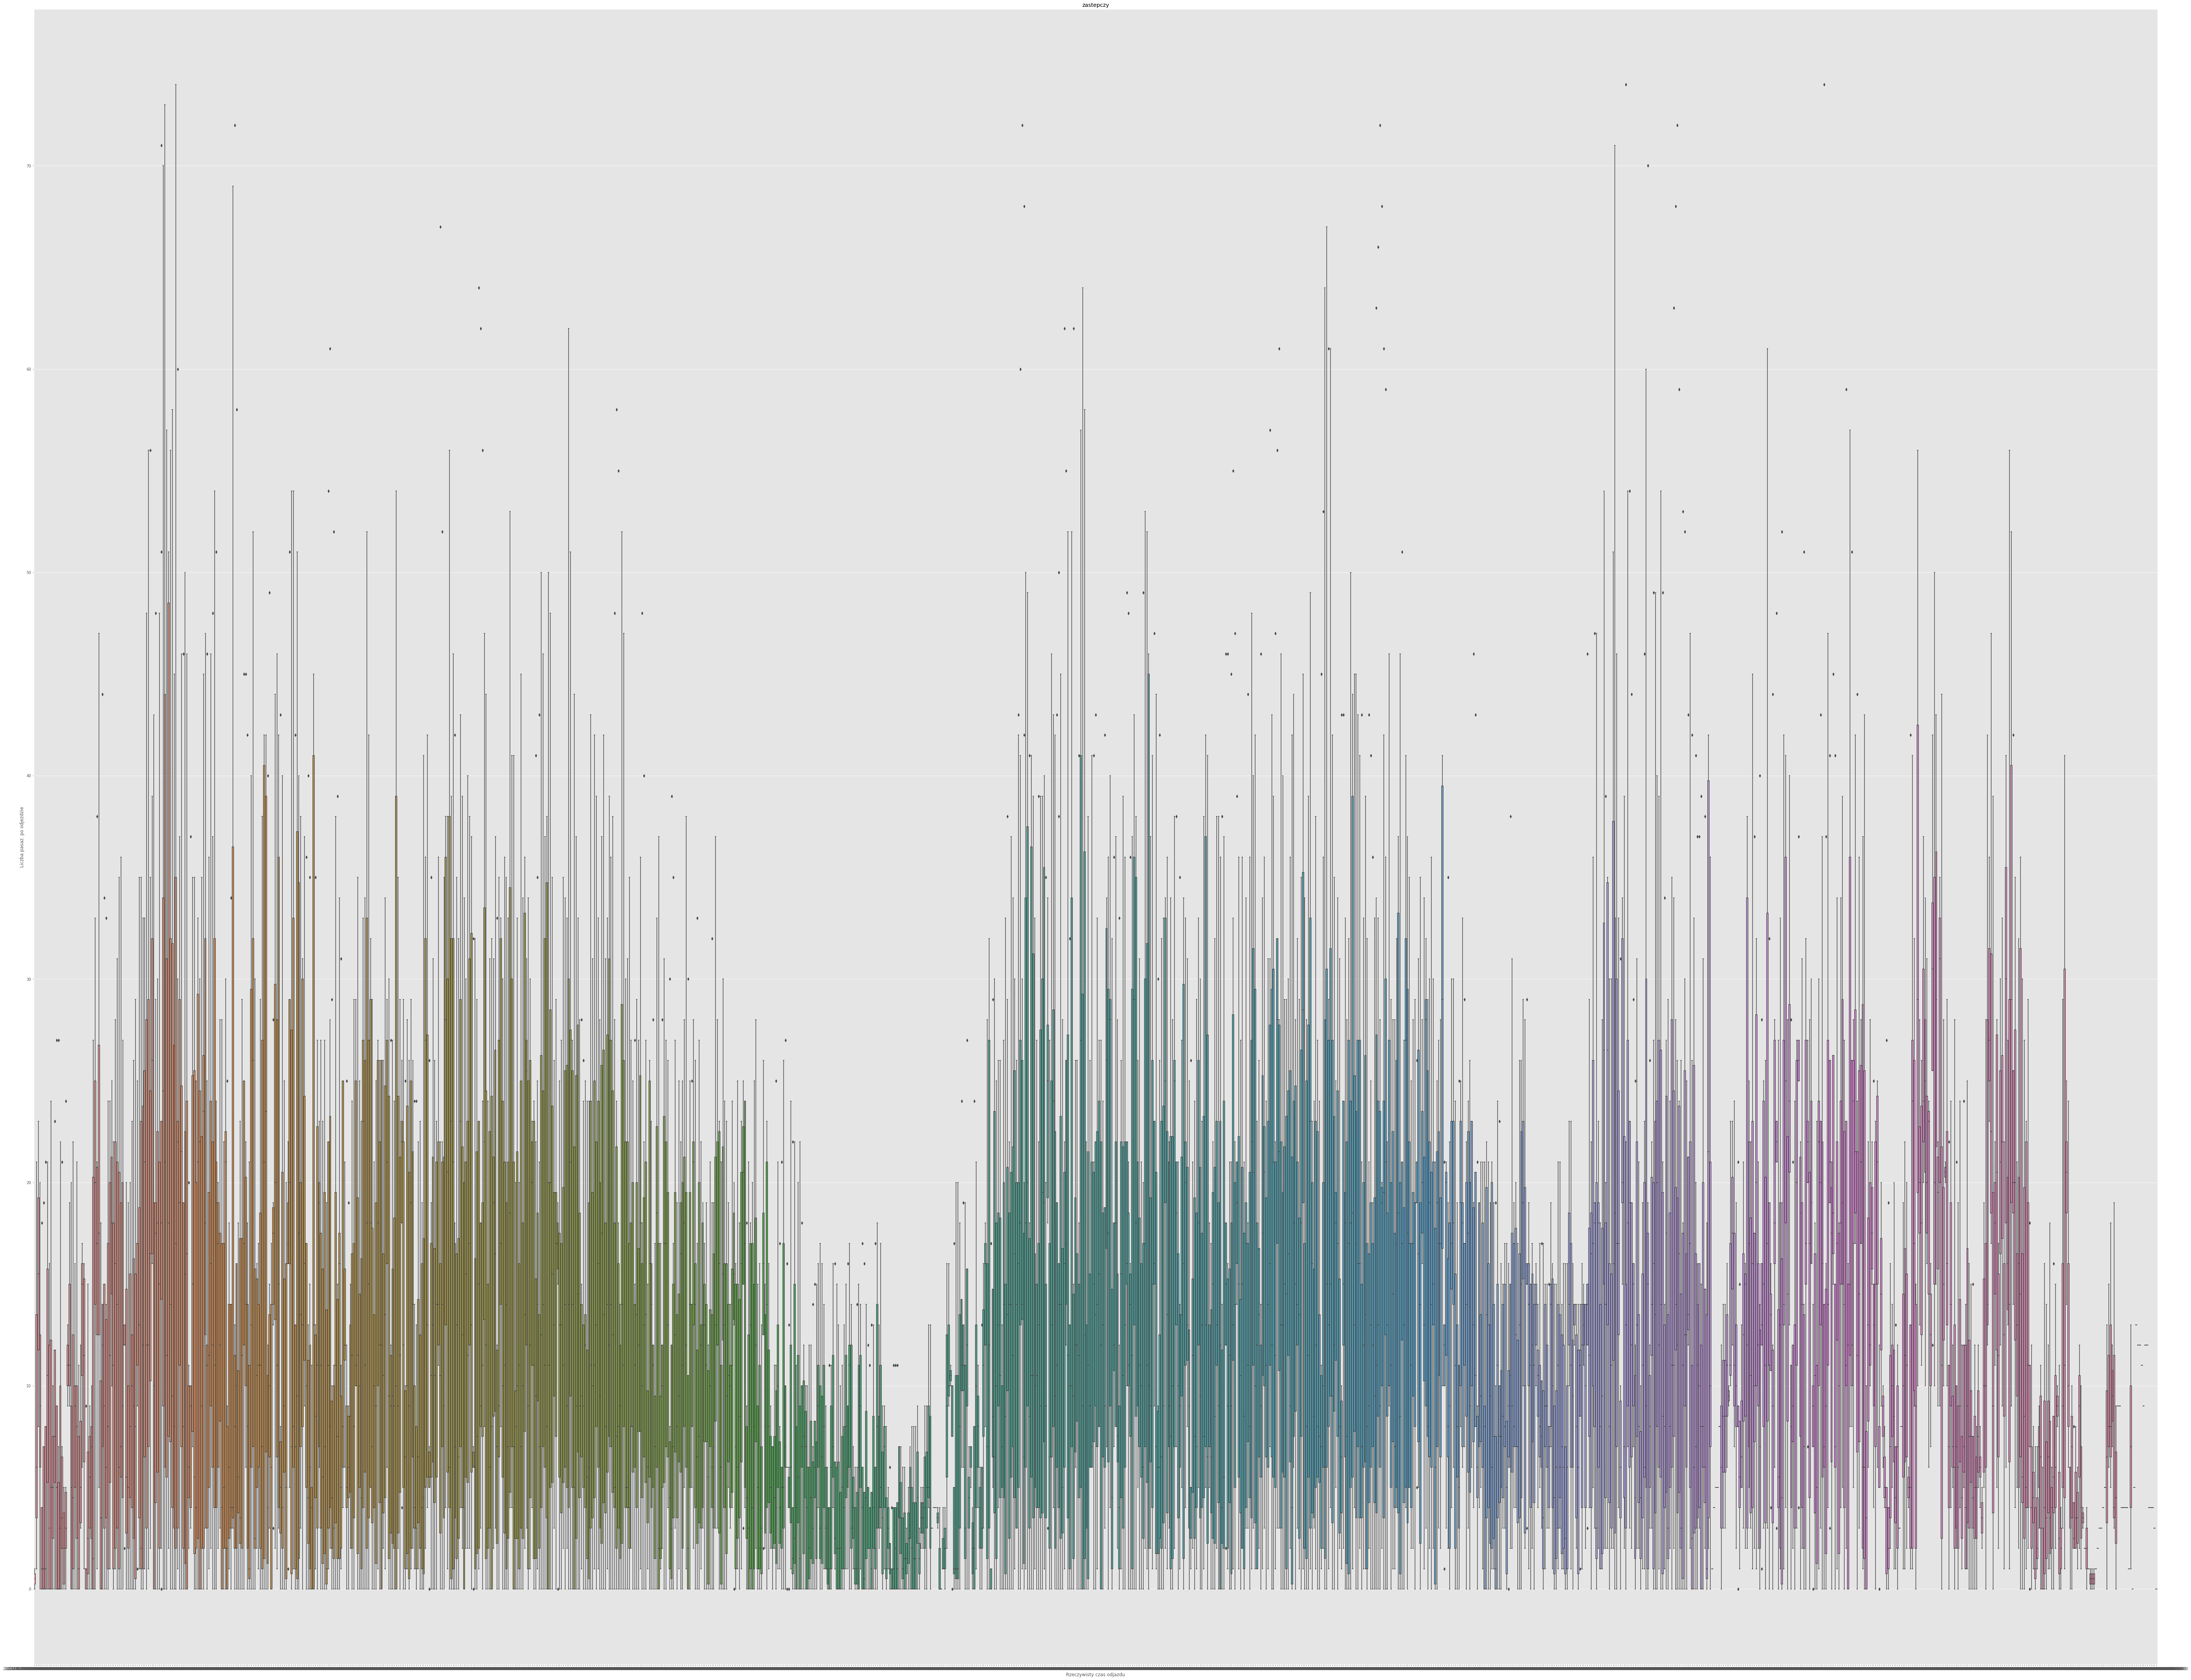

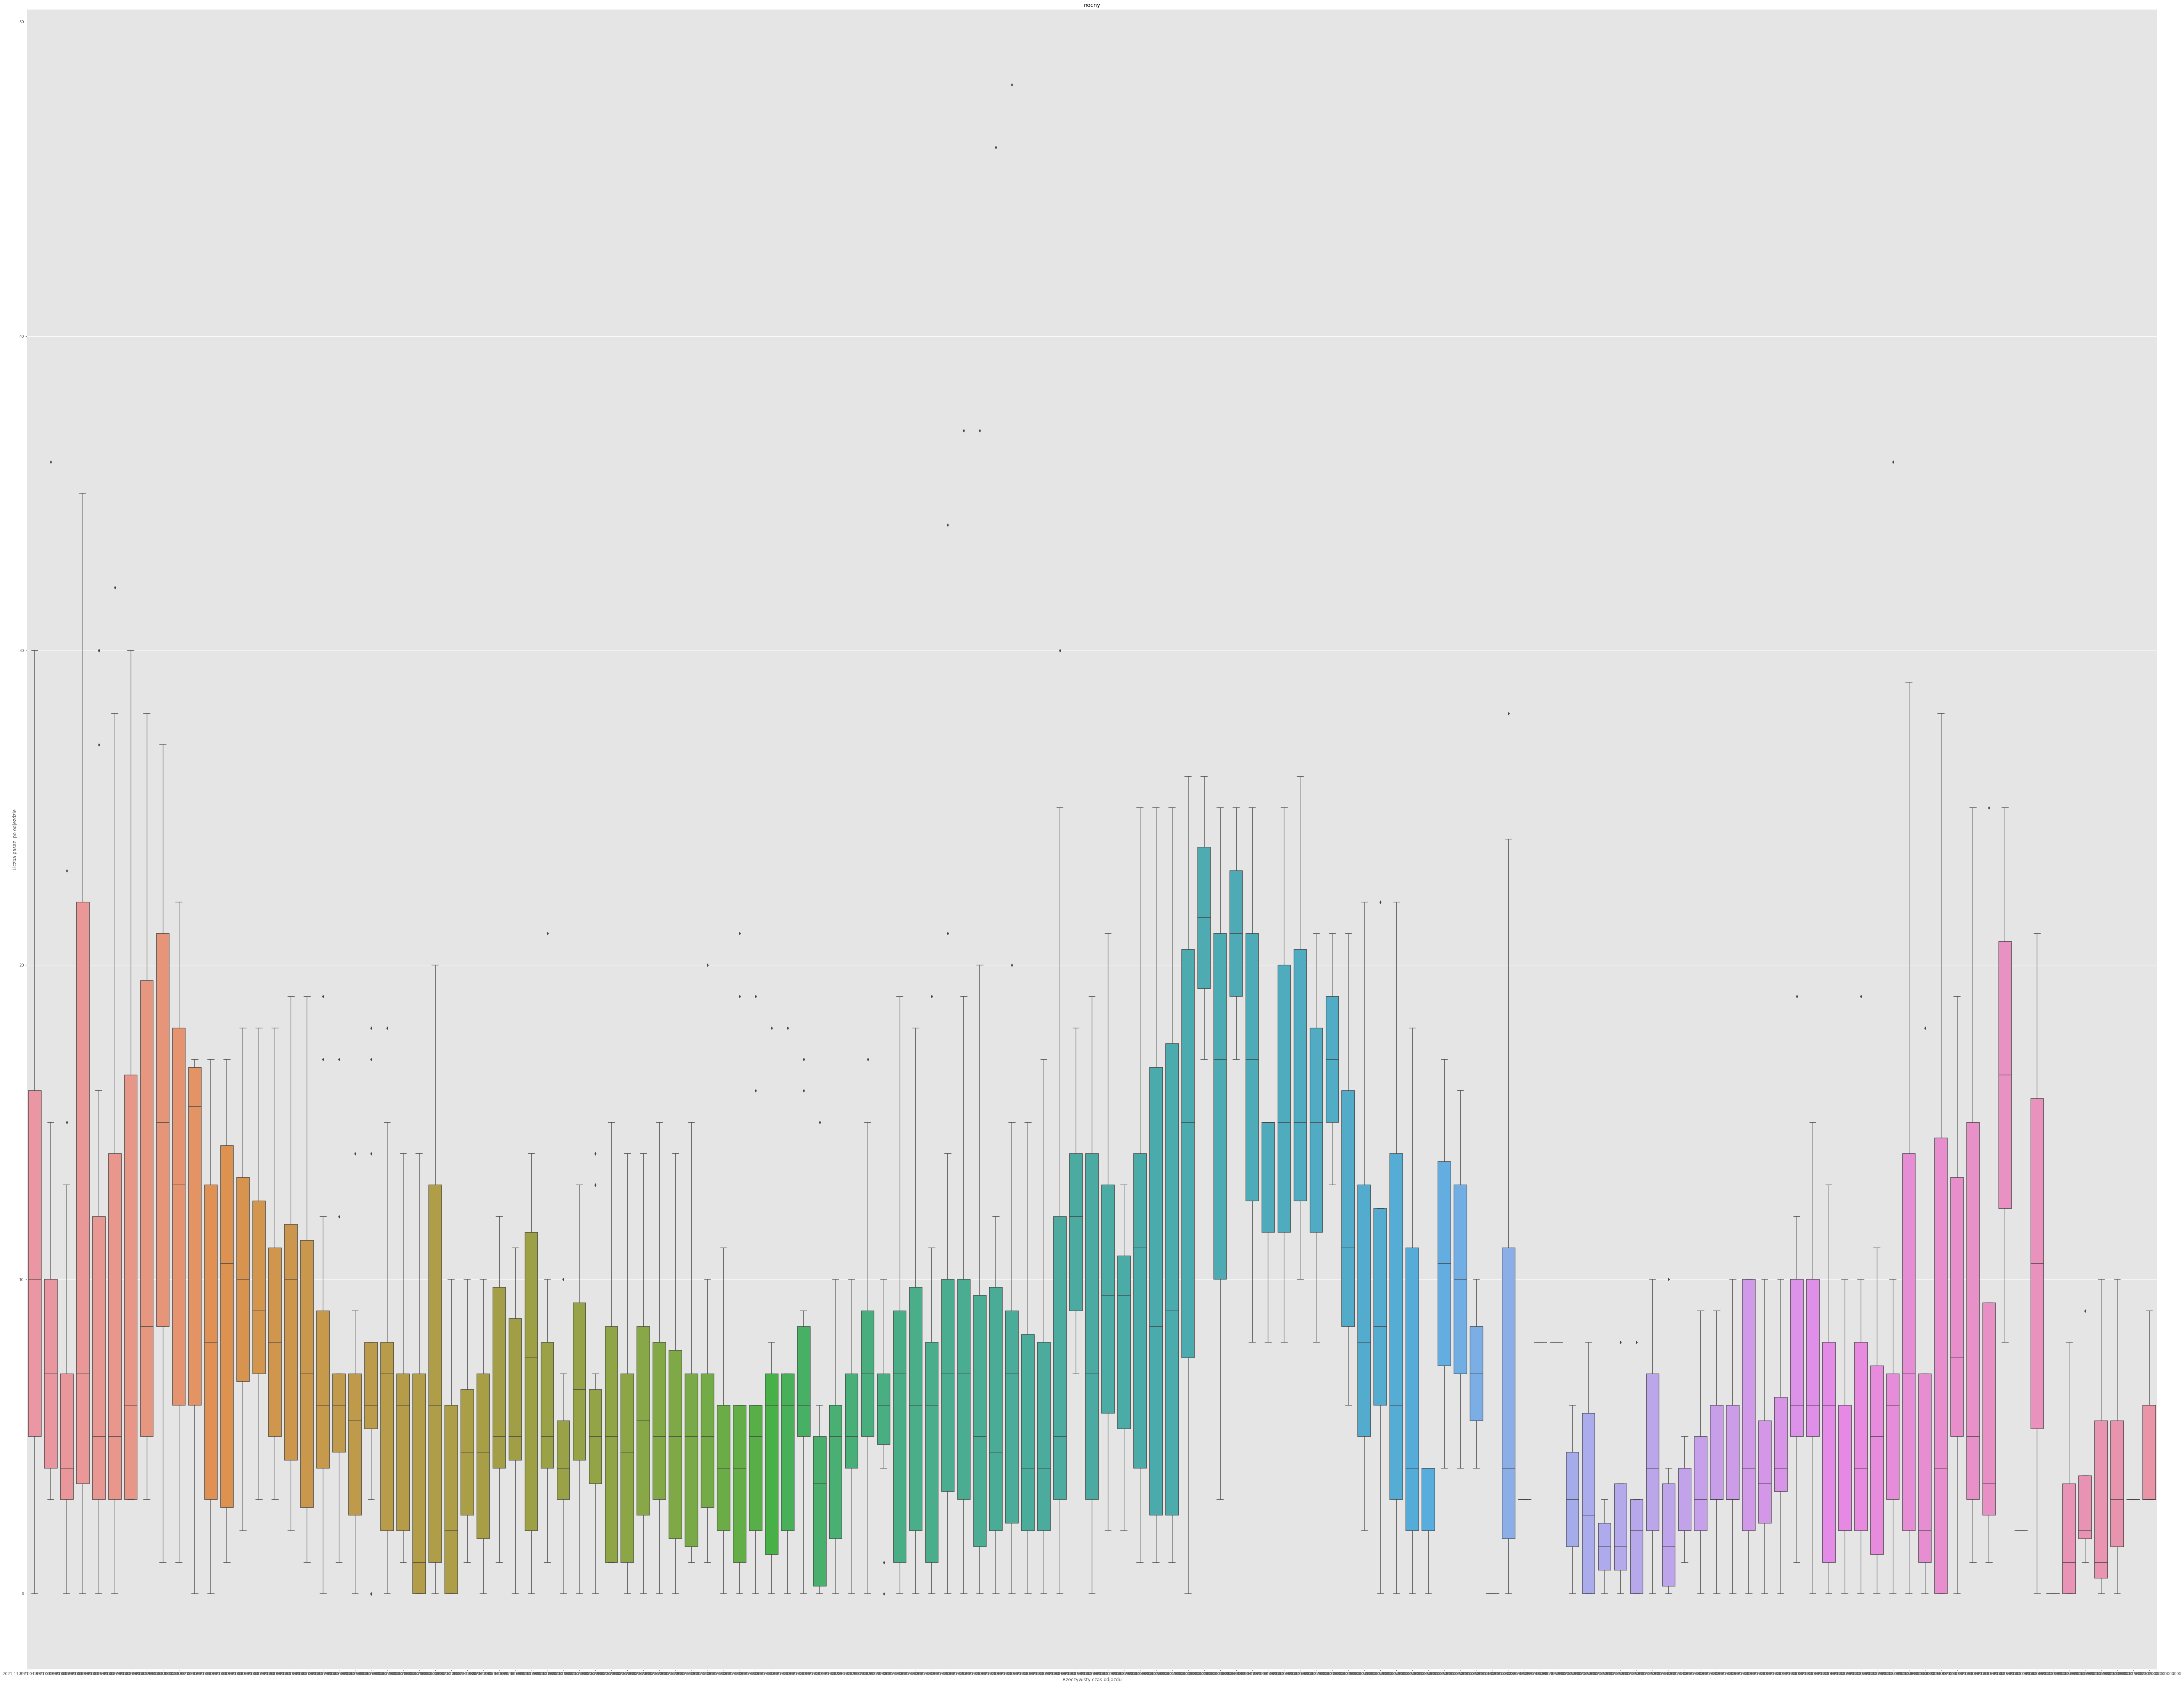

In [19]:
for trans_type in ['autobus', 'zastepczy', 'nocny']:
    plt.figure(figsize=(100, 80))
    ax = sns.boxplot(
        x='Rzeczywisty czas odjazdu',
        y='Liczba pasaz. po odjezdzie',
        data=df.loc[df['Typ']==trans_type]
    )
    ax.set_title(trans_type)

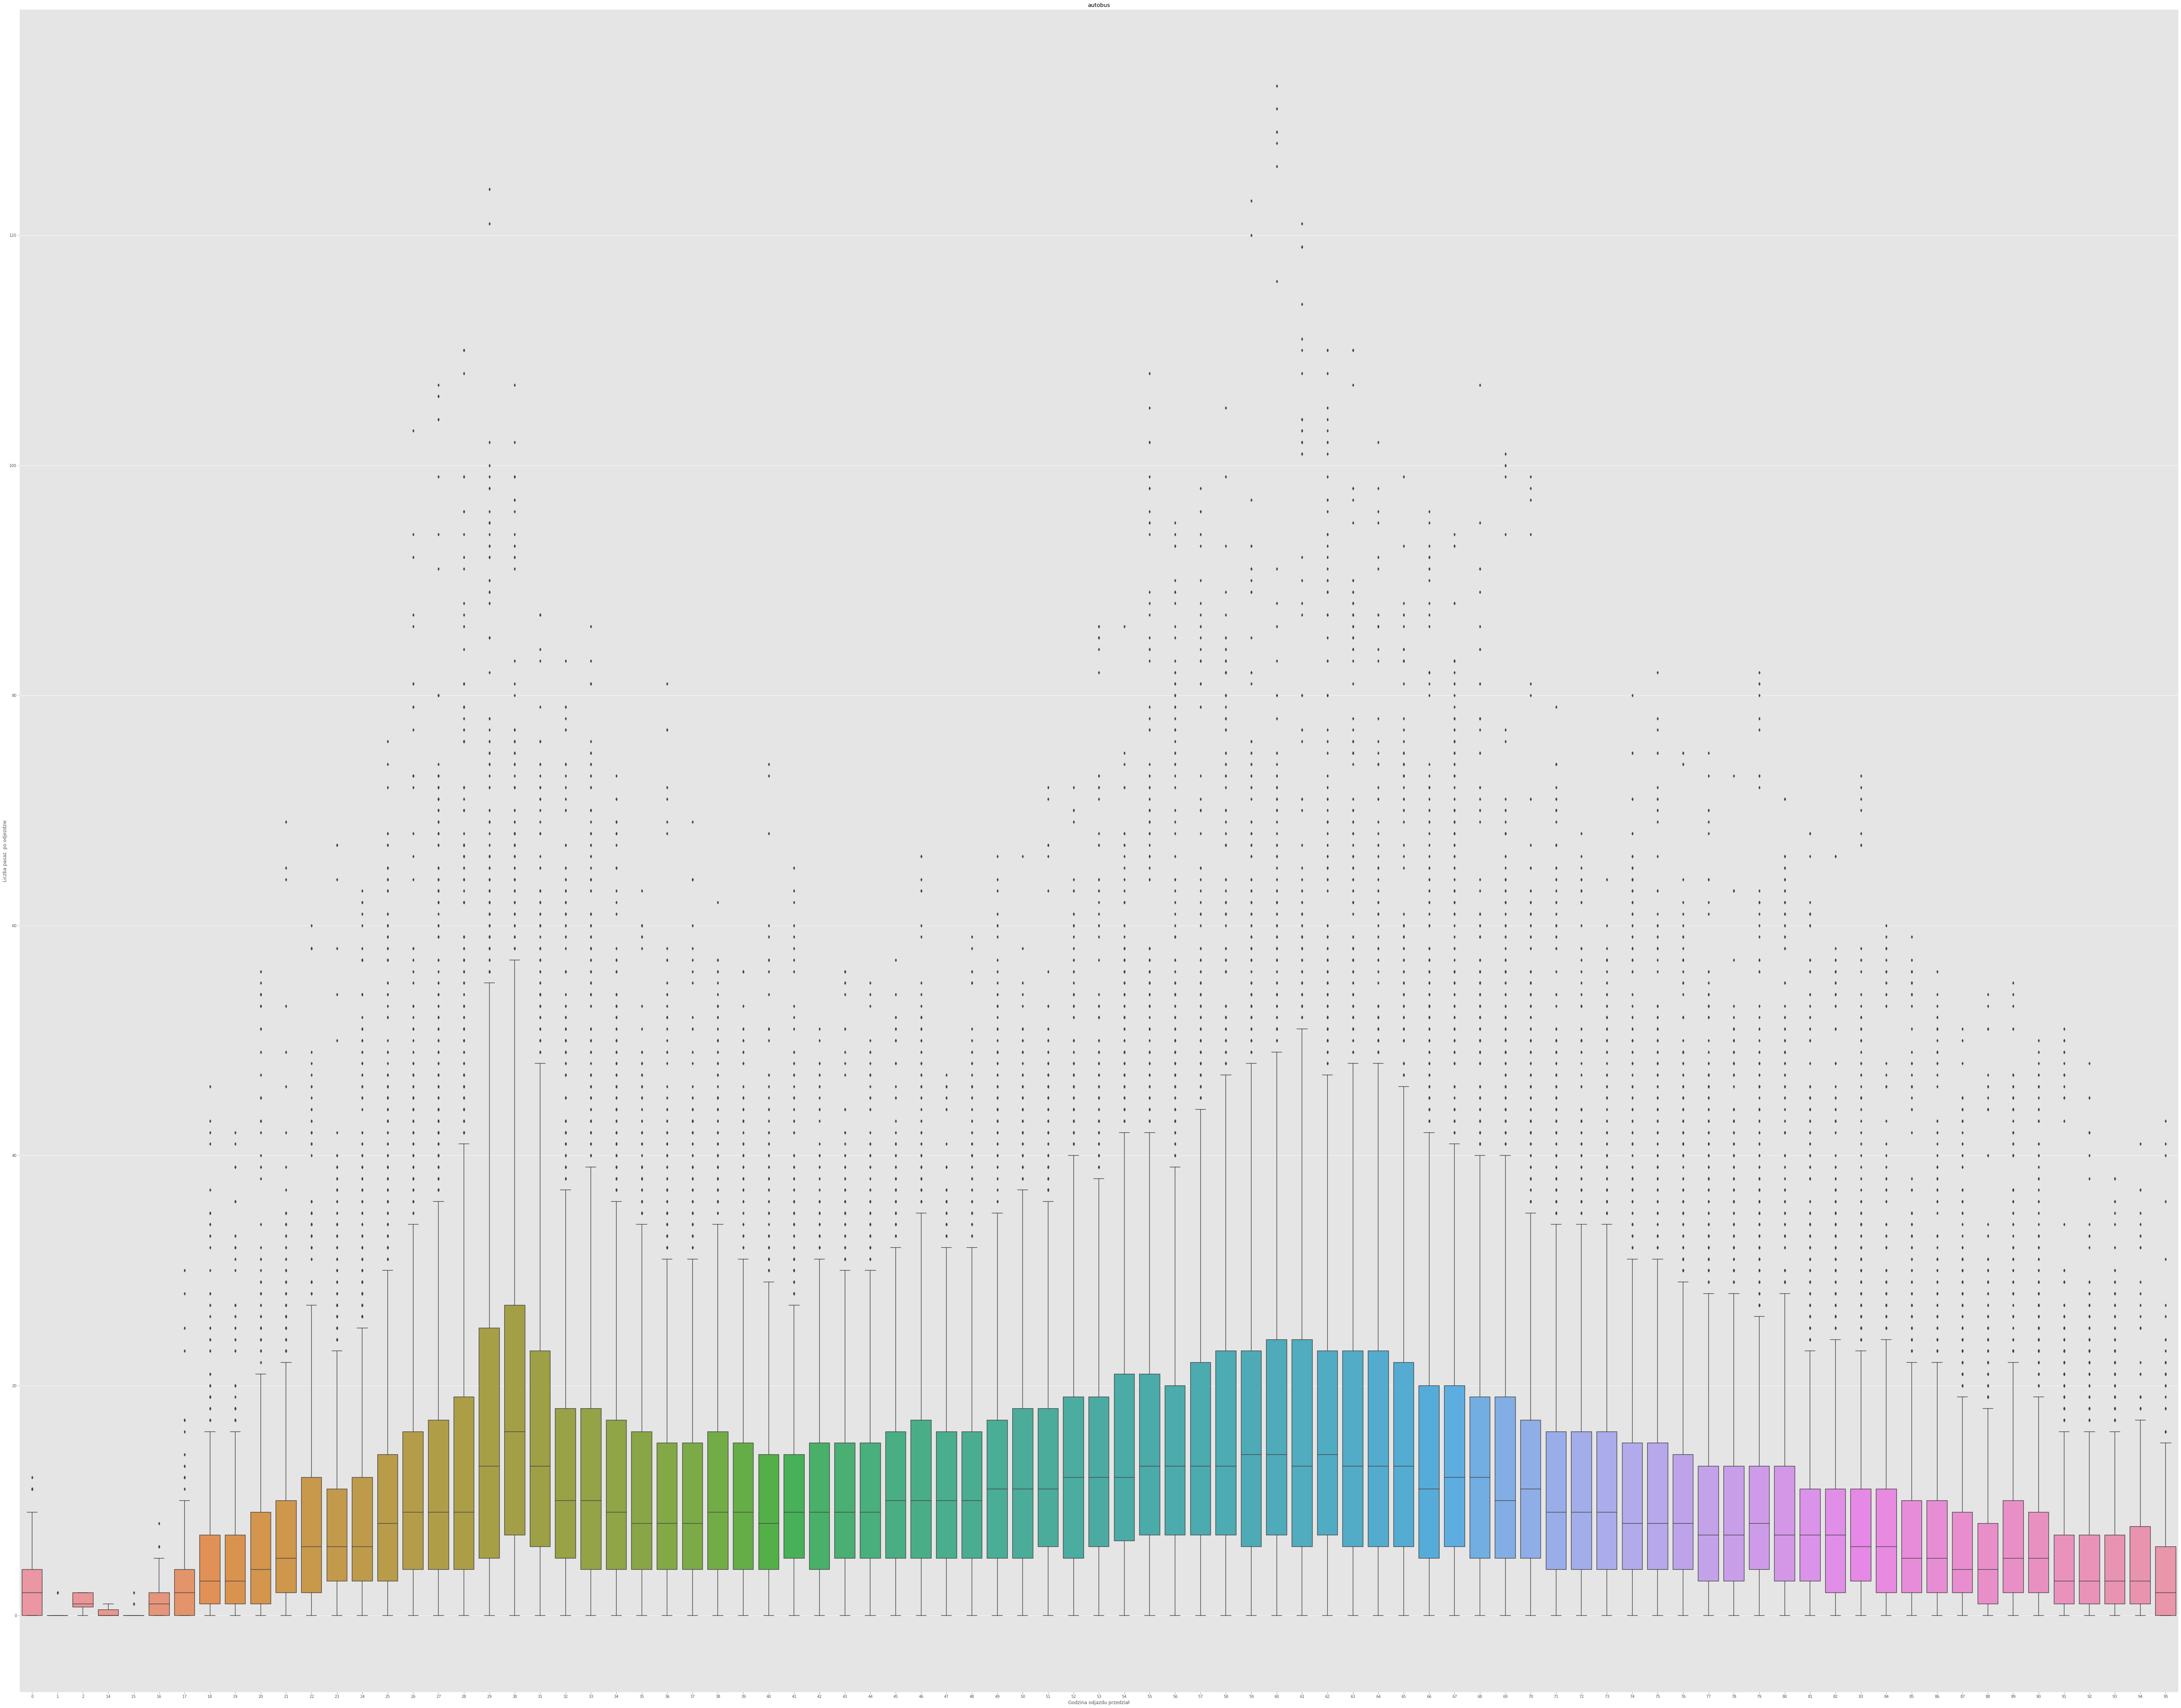

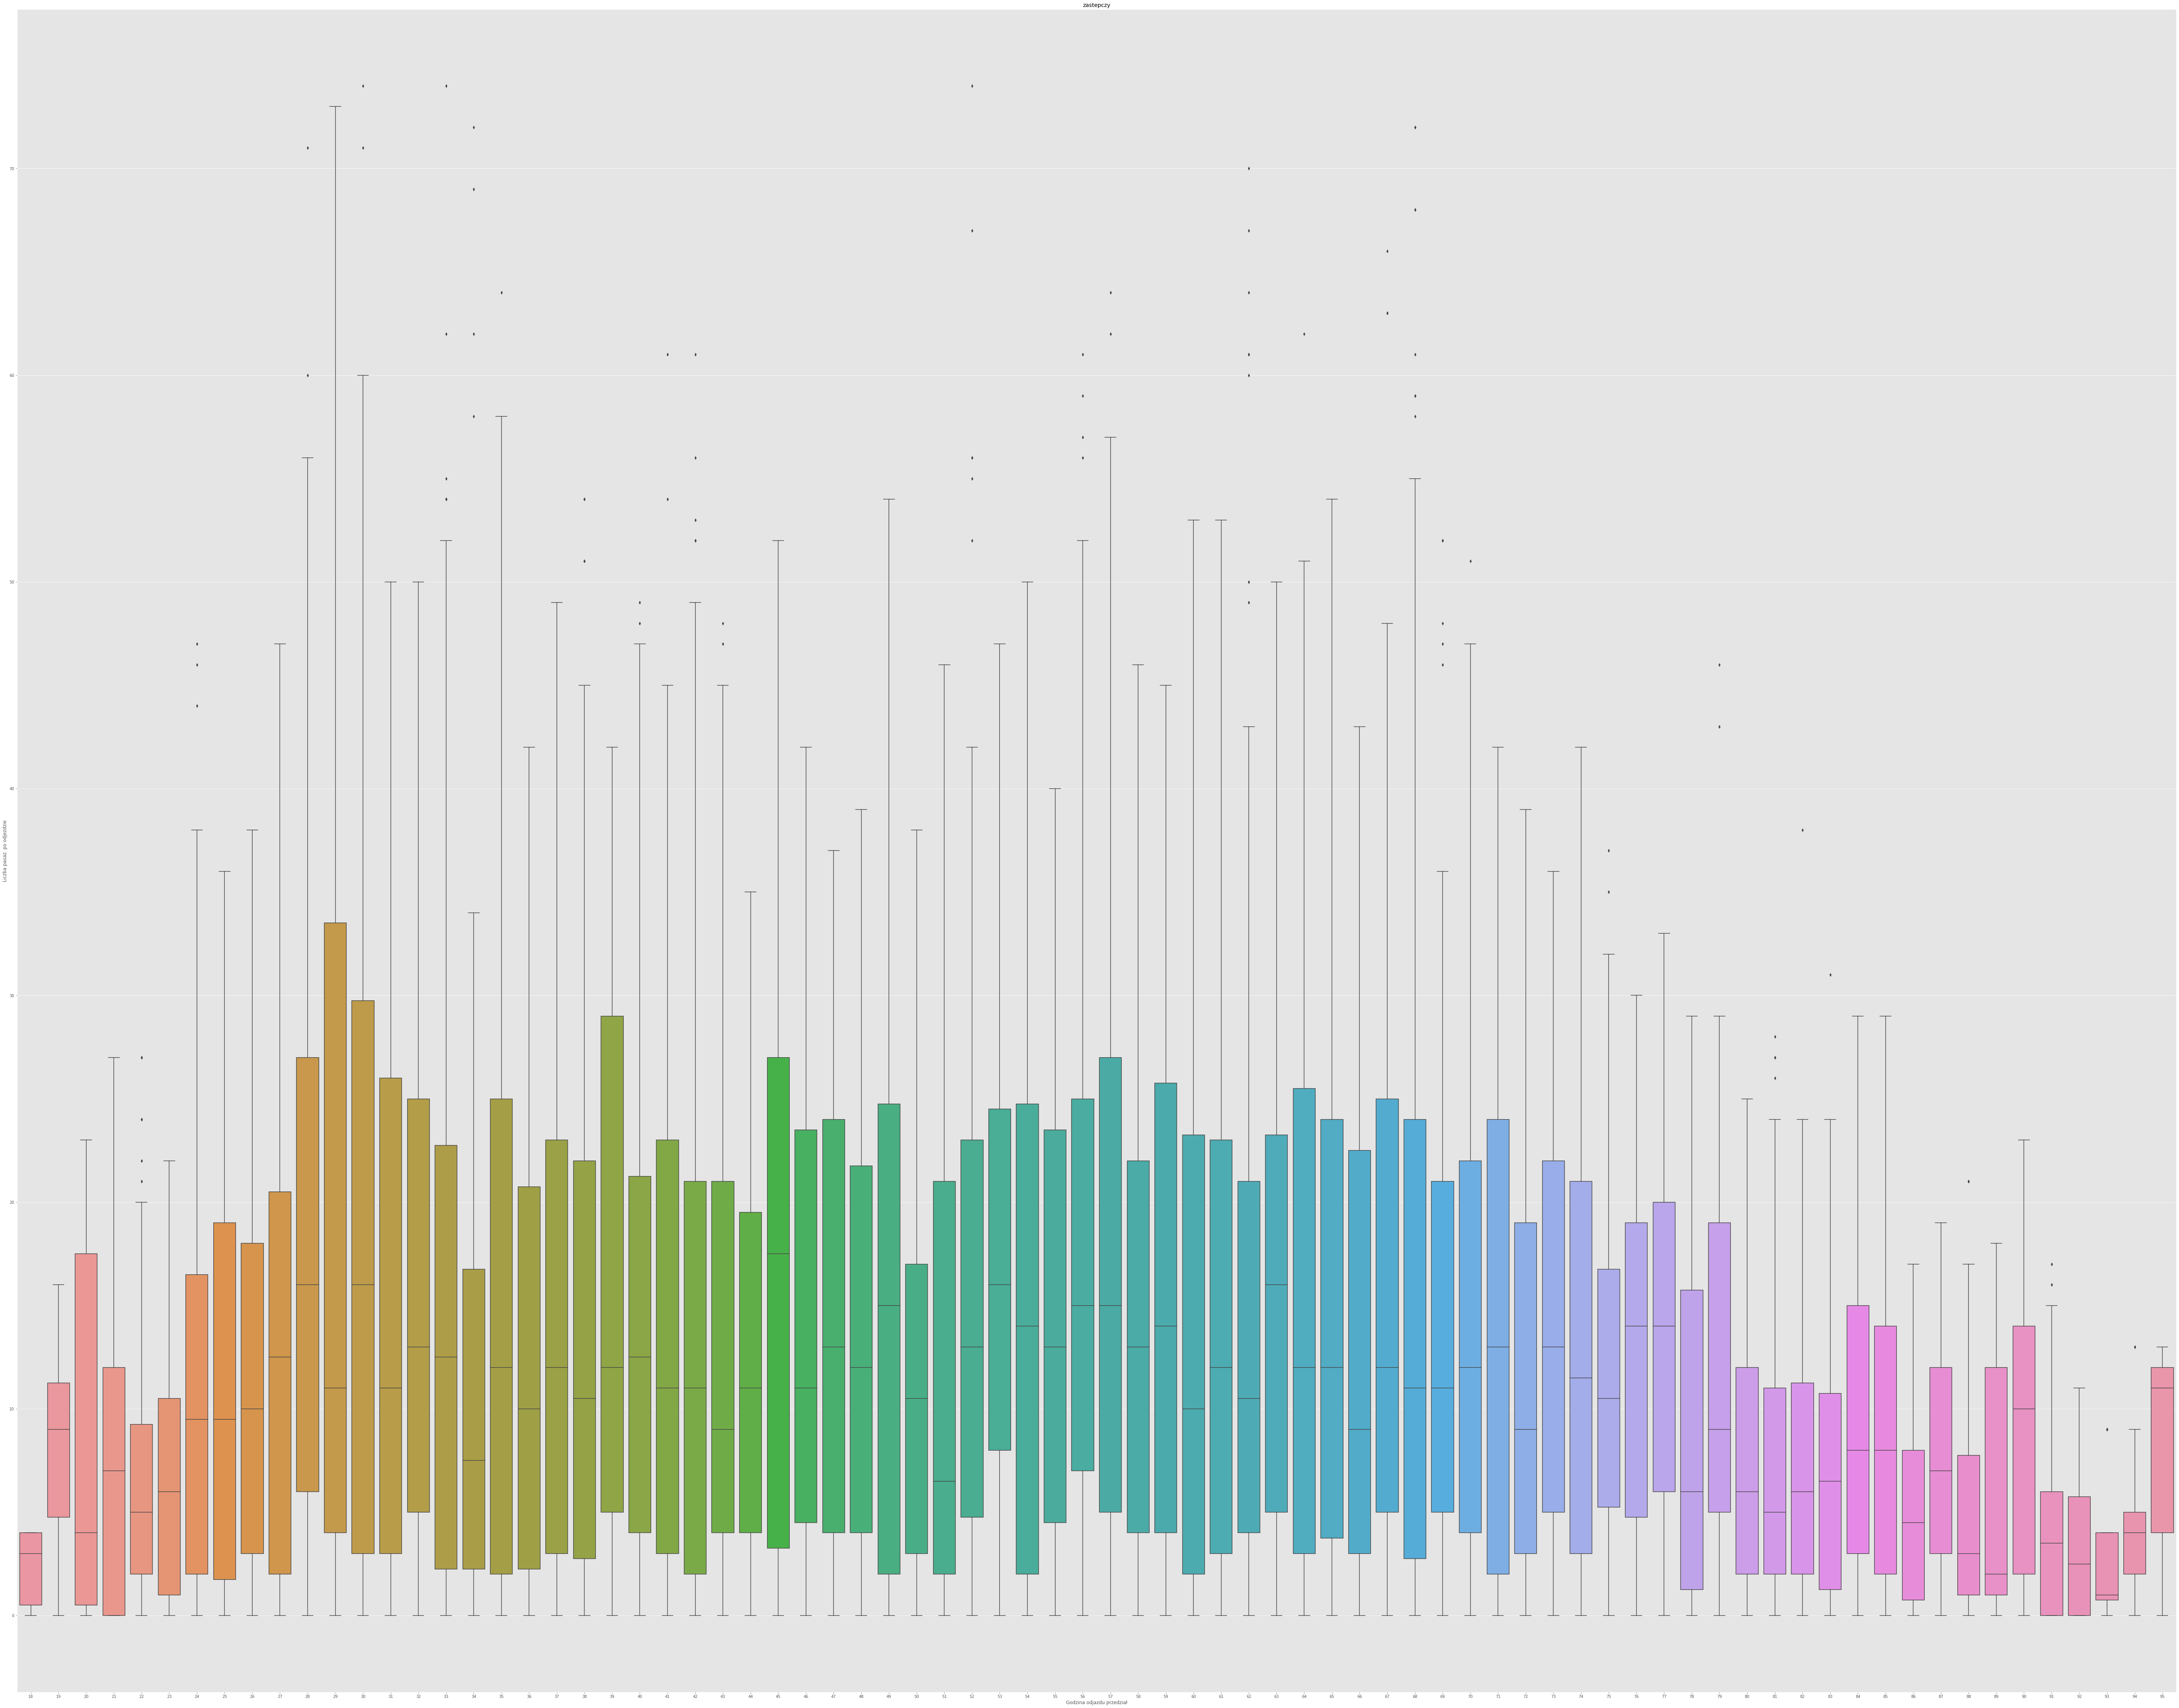

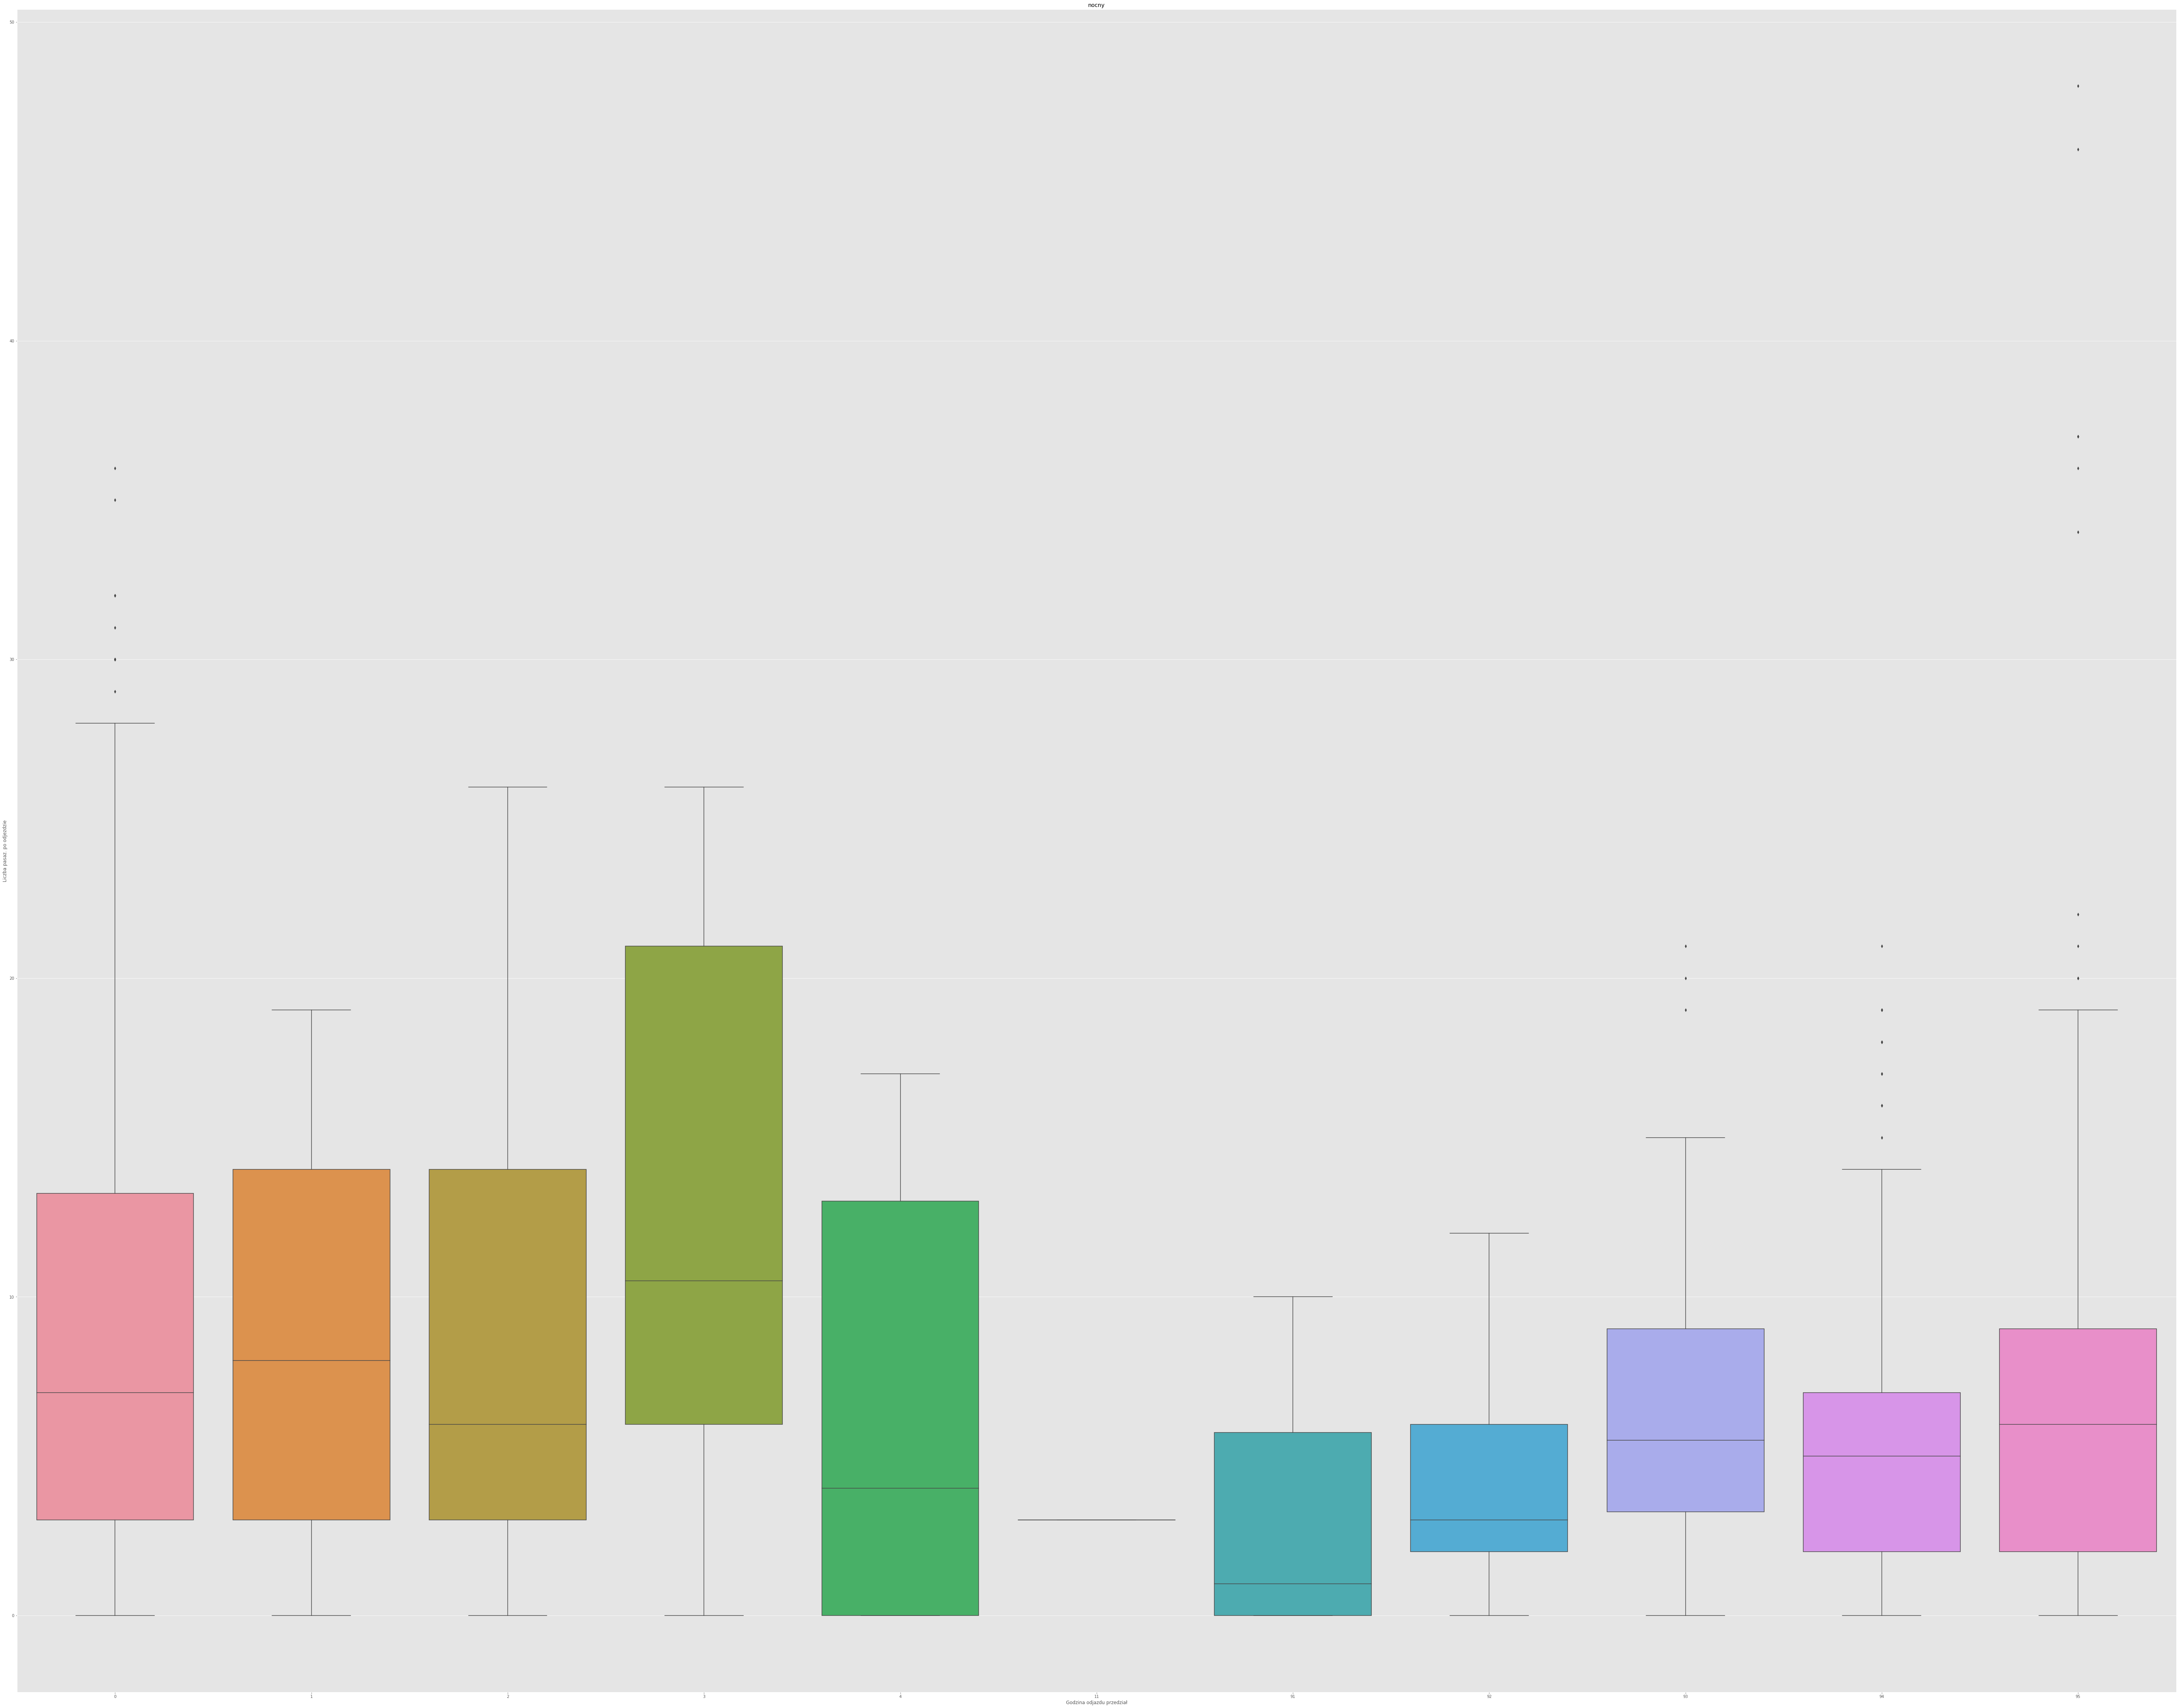

In [119]:
for trans_type in ['autobus', 'zastepczy', 'nocny']:
    plt.figure(figsize=(100, 80))
    ax = sns.boxplot(
        x='Godzina odjazdu przedział',
        y='Liczba pasaz. po odjezdzie',
        data=df.loc[df['Typ']==trans_type]
    )
    ax.set_title(trans_type)

# 5.1. Porównanie wybranych lini do globalnego podejscia

In [53]:
df_no_type = drop_other_types(df)
df_no_type.sample(5)

,Nr linii,Wariant linii,Kurs,Oznaczenie brygady,Numer taborowy,Nazwa przystanku,Numer przystanku,Rzeczywisty czas odjazdu,Rozkładowy czas odjazdu,Liczba pasaz. przed,Liczba wysiadających pasaz.,Liczba wsiadajacych pasaz.,Liczba pasaz. po odjezdzie,Godzina odjazdu,Godzina odjazdu przedział,class
83071,193,TP-UPN,2021-11-29 20:30:00,4,9925,Metro Służew,1,2021-11-29 20:39:00,2021-11-29 20:40:00,9,7,0,2,20.666667,82,pusto
70063,181,TP-PLW,2021-11-29 17:29:00,3,9548,Dzierżoniowska,1,2021-11-29 17:35:00,2021-11-29 17:35:00,13,0,1,14,17.583333,70,małe zatłoczenie
108556,211,TX-DWI,2021-11-29 14:38:00,10,9085,Dzierzgońska,1,2021-11-29 14:43:00,2021-11-29 14:46:00,47,22,8,33,14.766667,59,duze zatłoczenie
135728,516,TP-FSO,2021-11-29 16:31:00,5,9414,Płochocińska,1,2021-11-29 16:52:00,2021-11-29 16:56:00,6,1,1,6,16.933333,67,pusto
81100,193,TP-BOK,2021-11-29 14:57:00,1,9924,Ursynów Płd.,1,2021-11-29 15:02:00,2021-11-29 15:04:00,7,1,5,11,15.066667,60,małe zatłoczenie


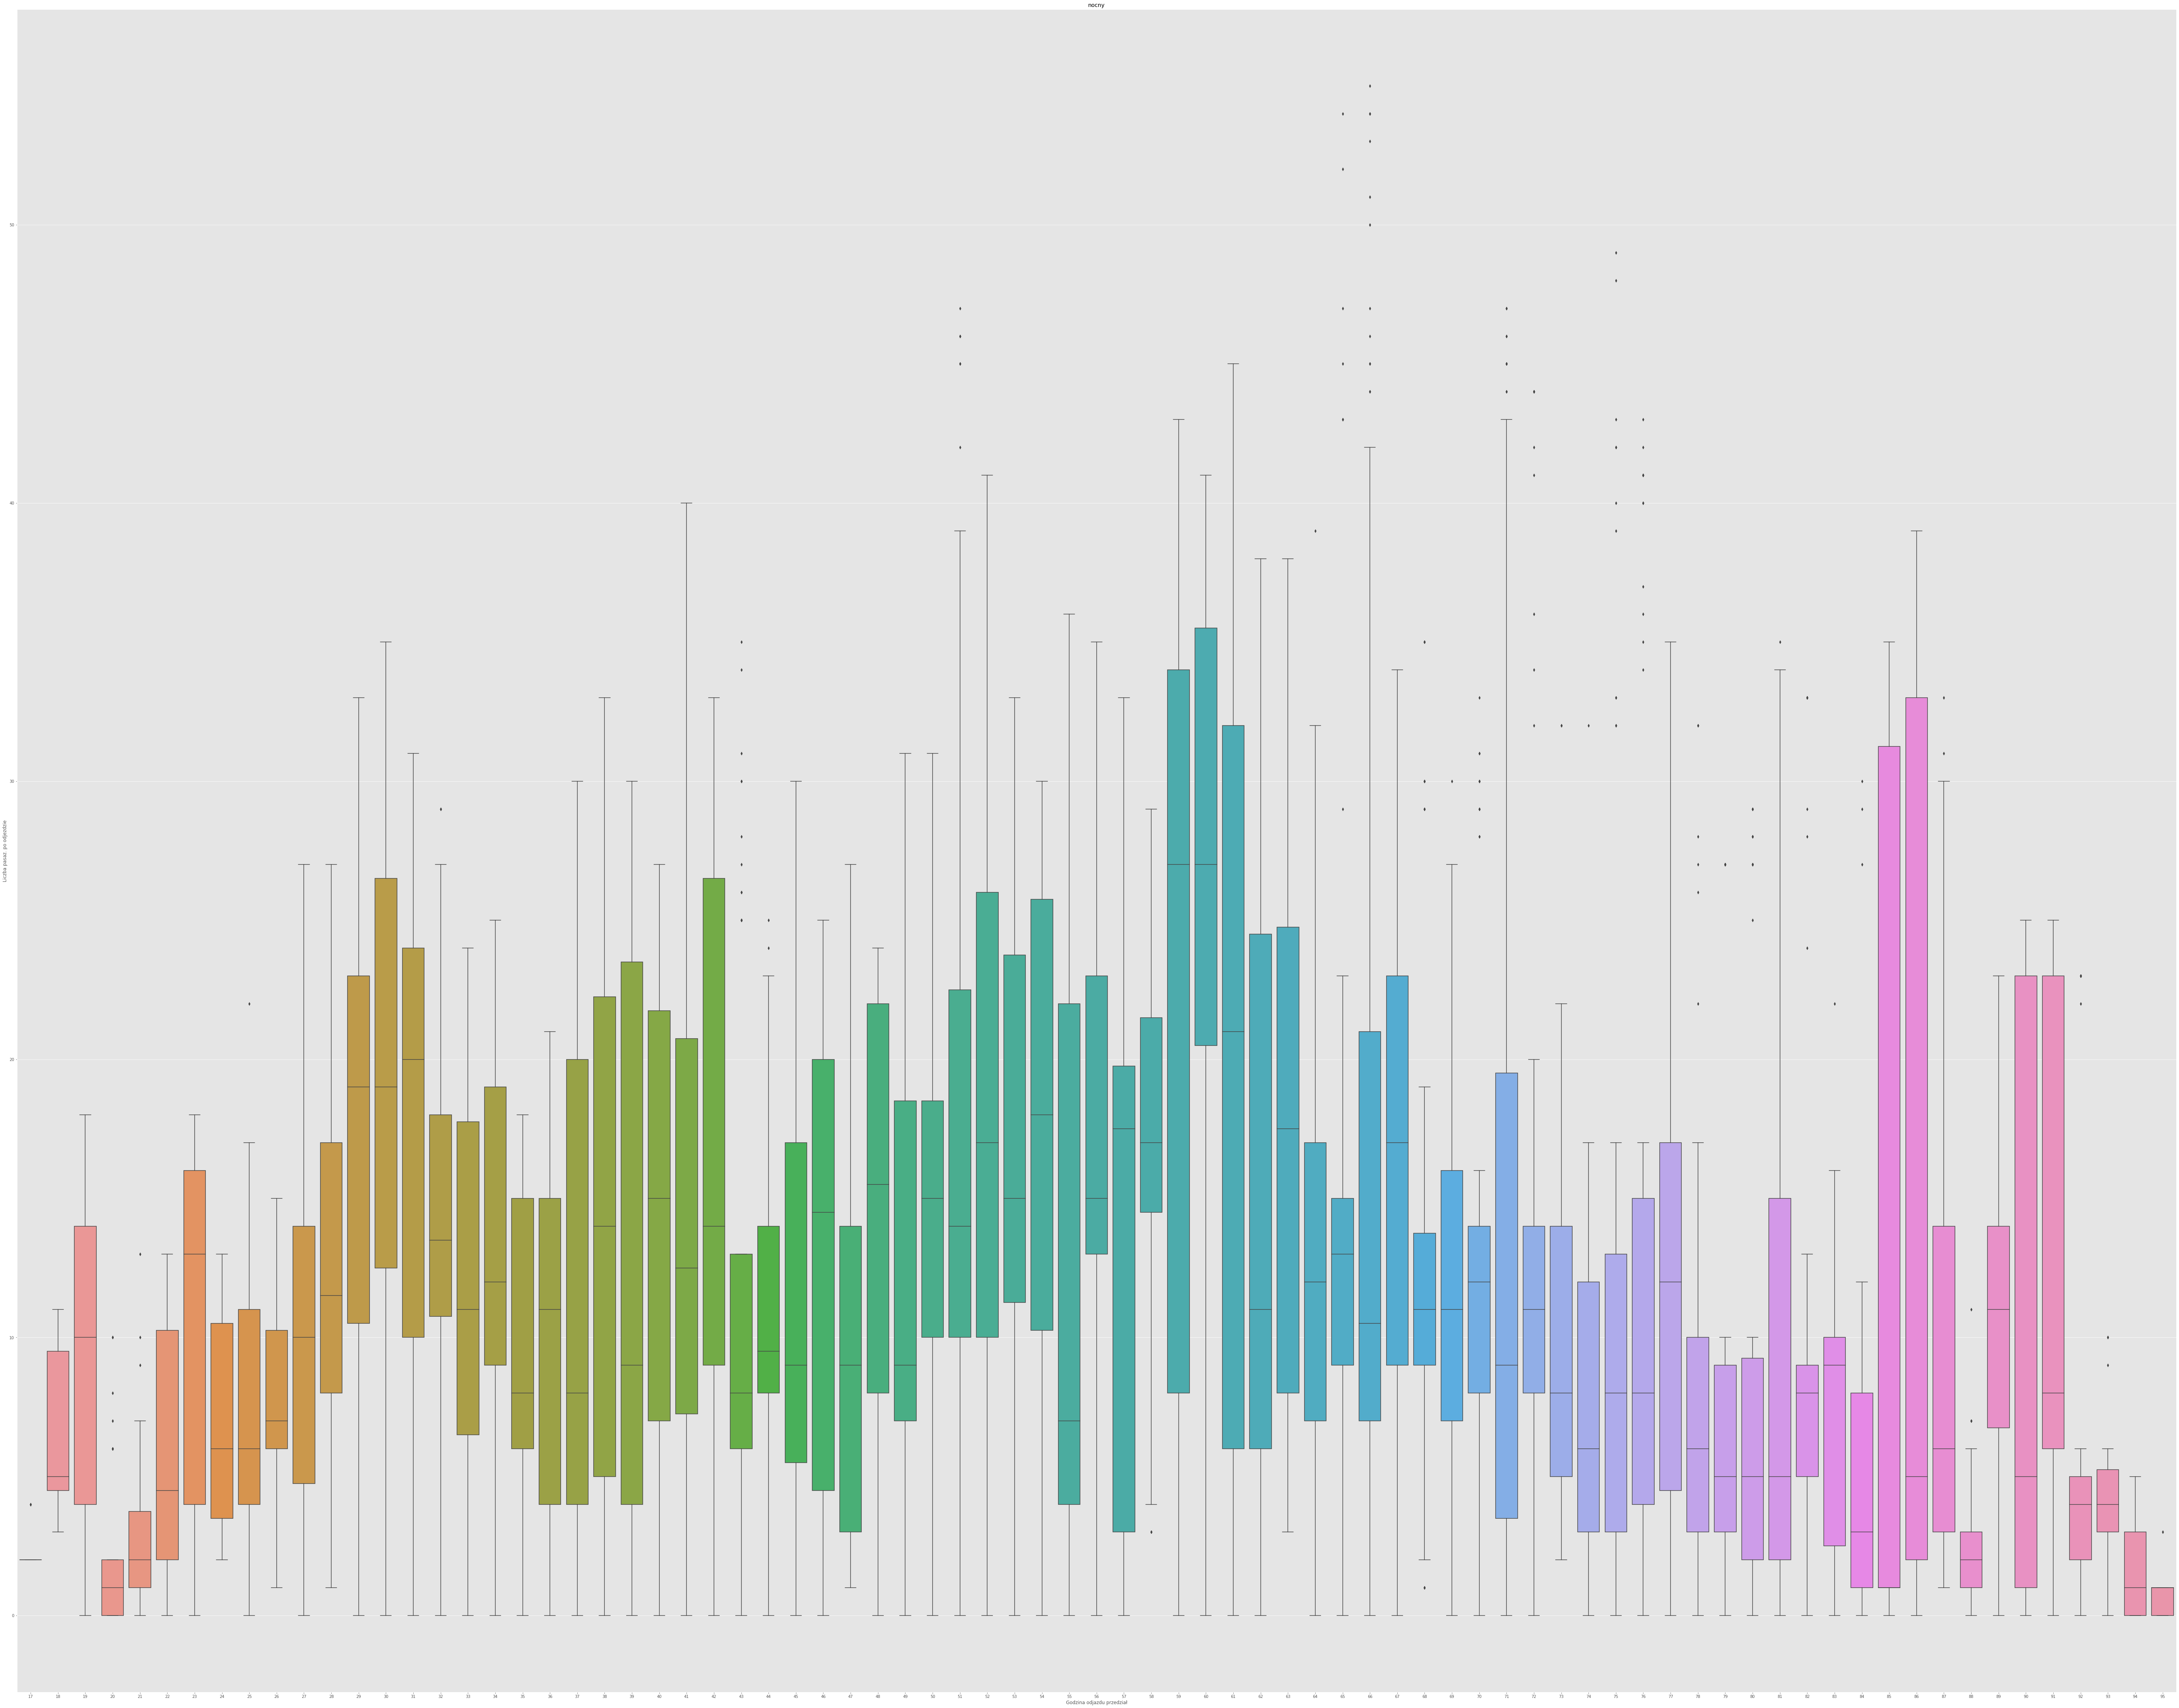

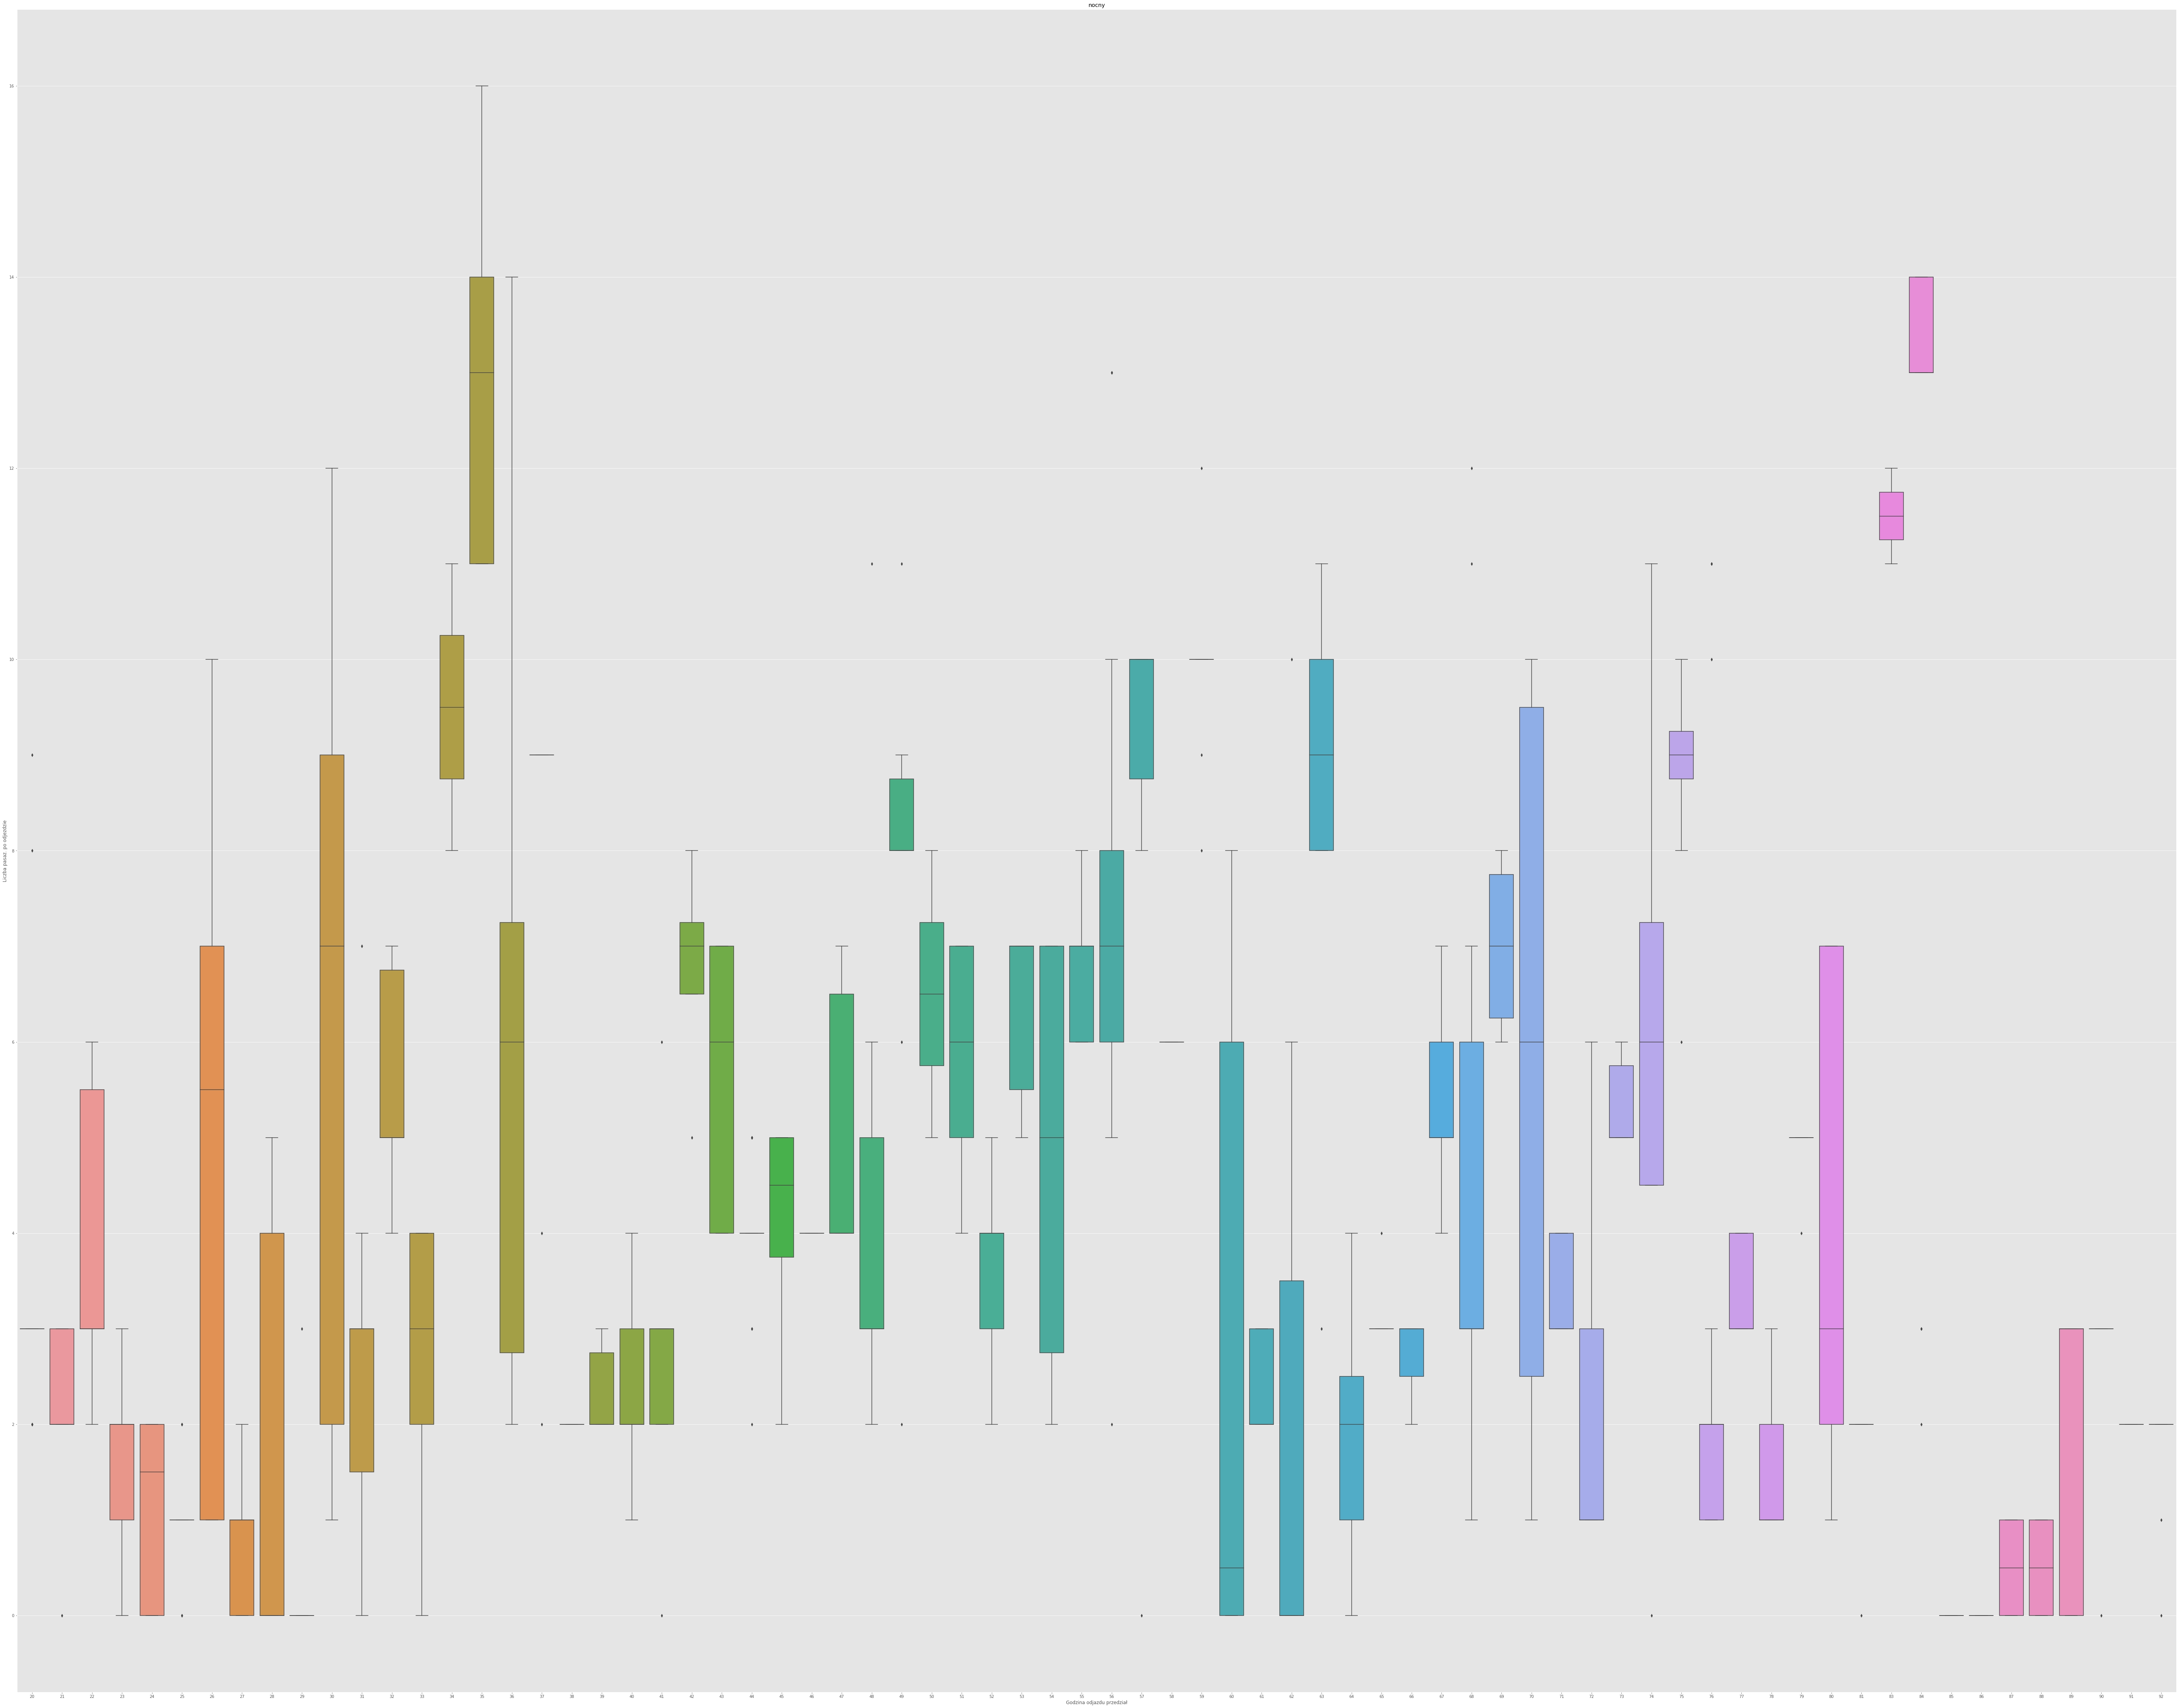

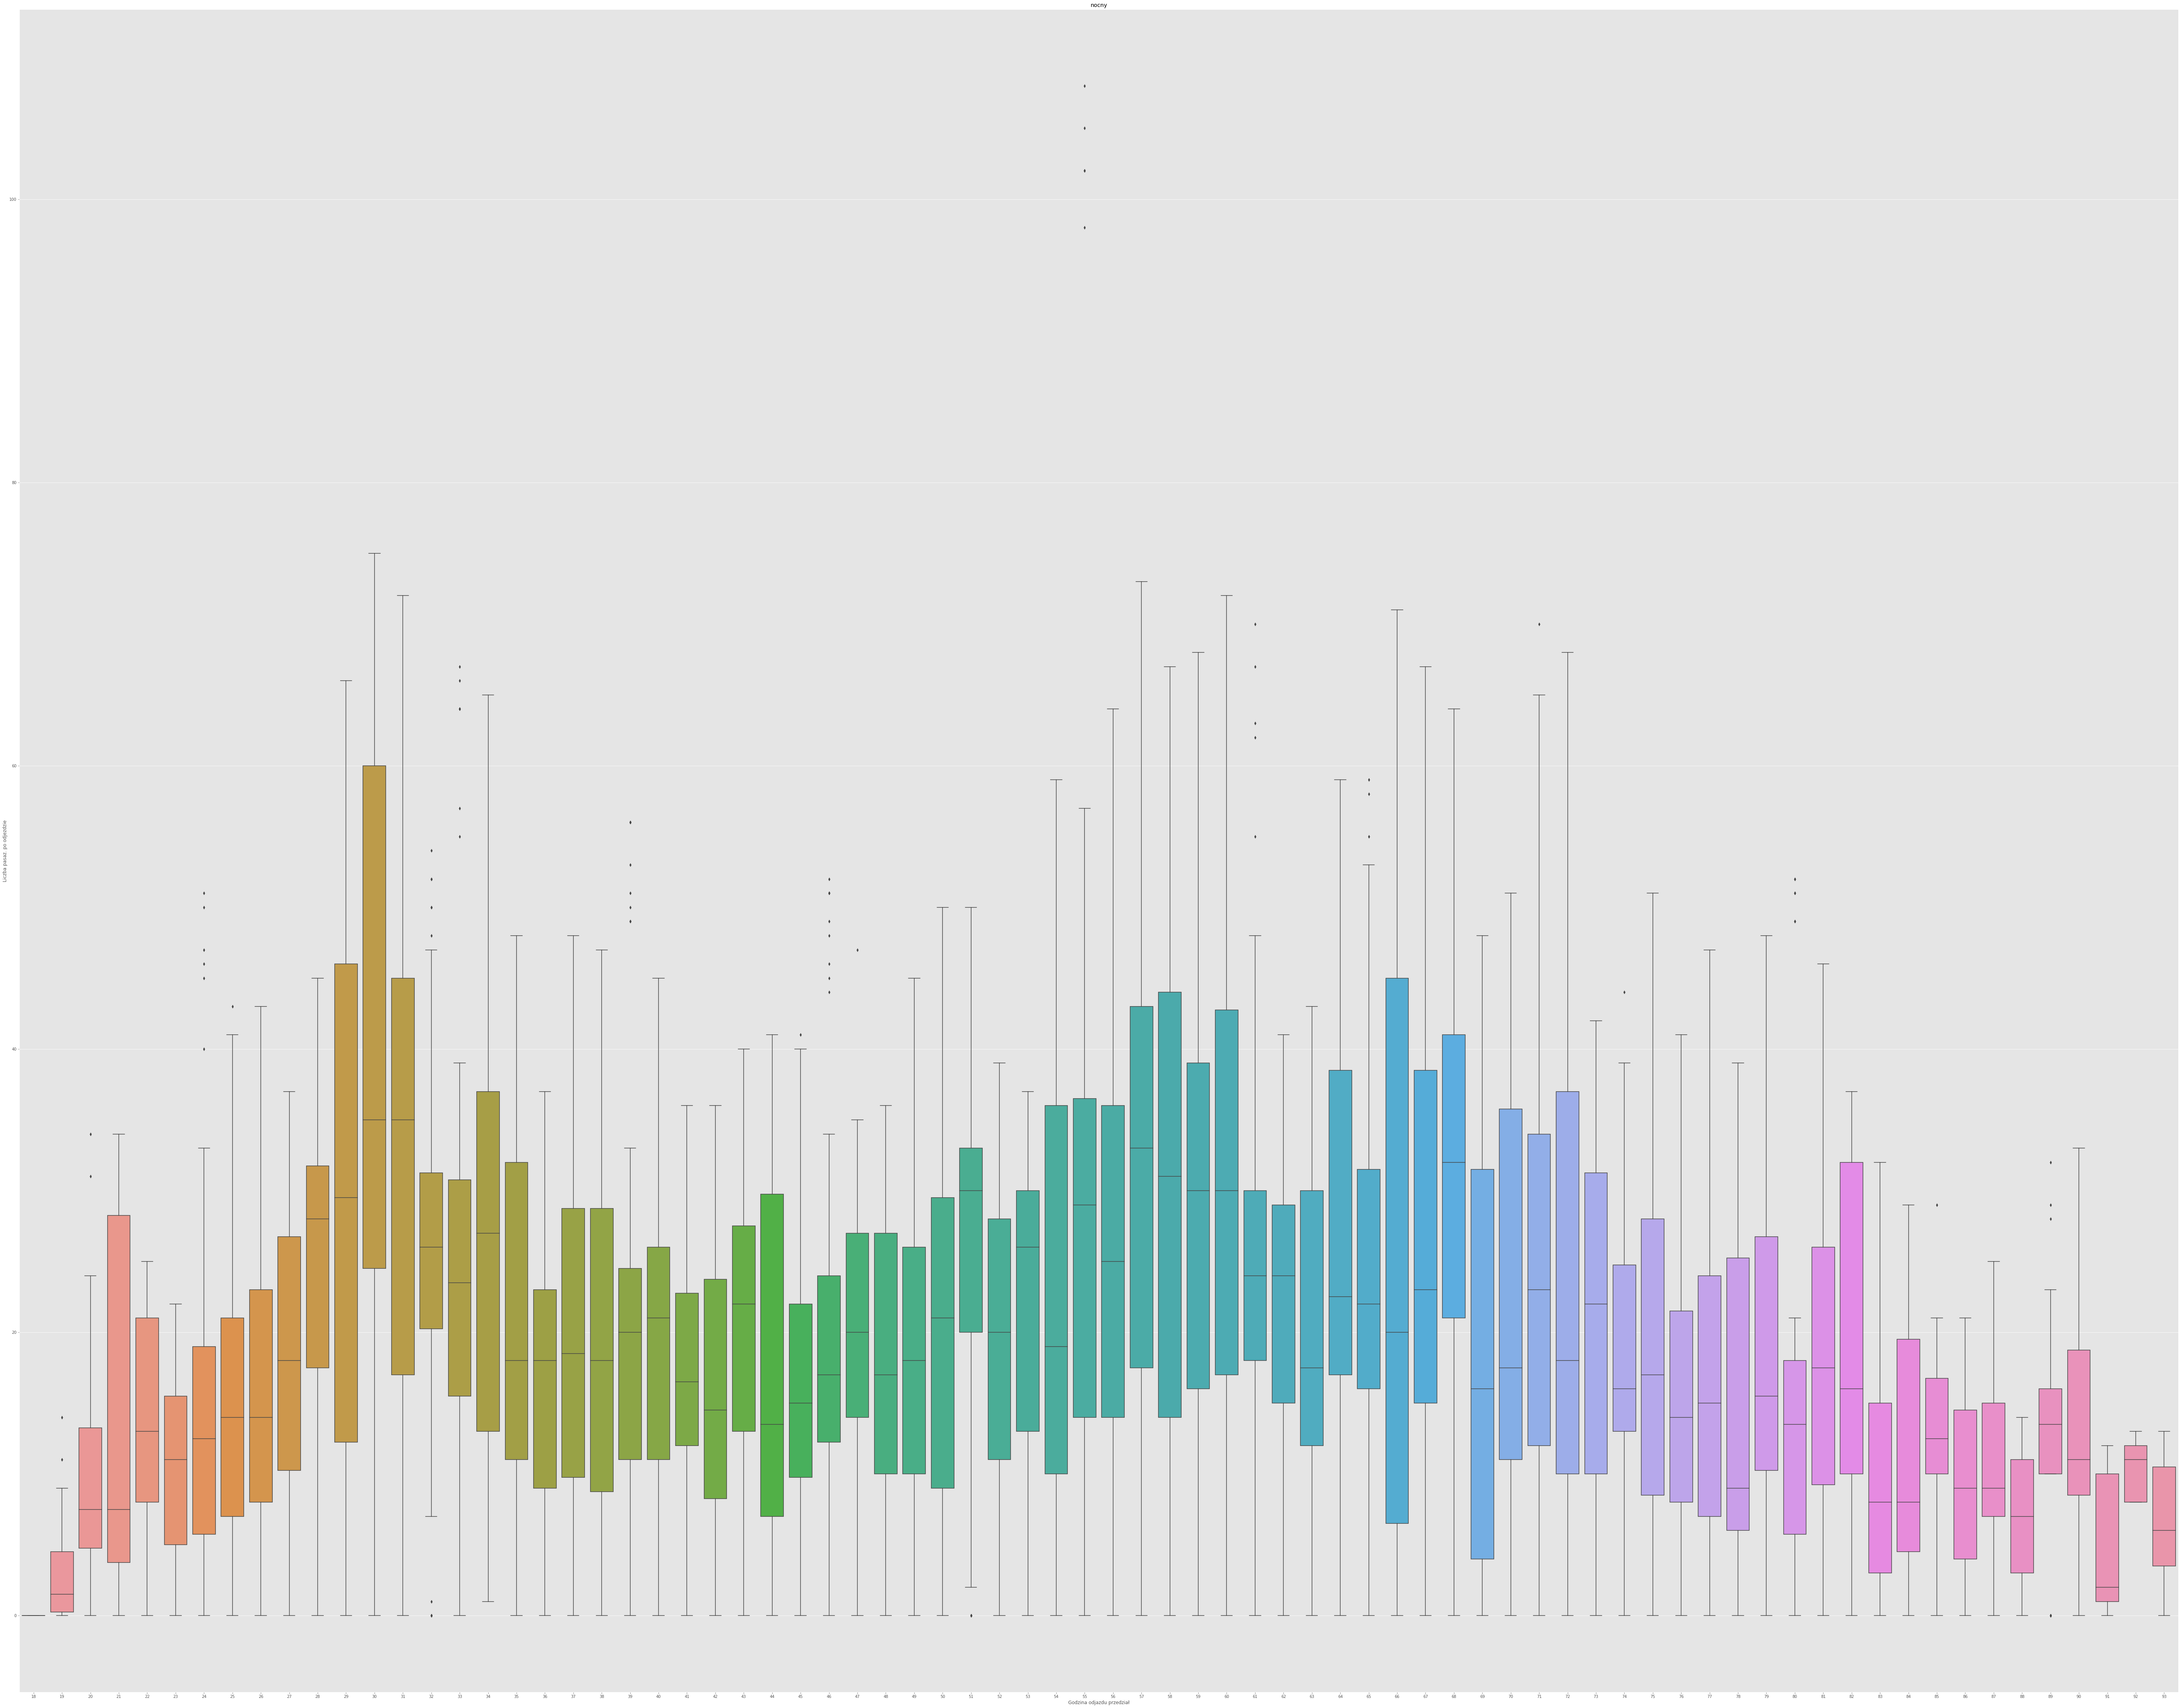

In [129]:
for line_number in ['142', '264', '525']:
    plt.figure(figsize=(100, 80))
    ax = sns.boxplot(
        x='Godzina odjazdu przedział',
        y='Liczba pasaz. po odjezdzie',
        data=df_no_type.loc[df['Nr linii']==line_number]
    )
    ax.set_title(trans_type)

# 6. Clustering

In [18]:
def find_clusters(speeds, iterations, df, column):
    k = len(speeds)
    data = np.array(df[column]).reshape(1,-1).T
    clusters = KMeans(
        n_clusters = k,
        max_iter = iterations,
        random_state = RANDOM_SEED
    ).fit(data)
    
    cc, *_ = clusters.cluster_centers_.reshape(1,k)
    cc_ord = np.argsort(cc)
    class_mapping = dict(zip(cc_ord, speeds))
    
    df['class'] = clusters.labels_
    df['class'] = df['class'].map(class_mapping)
    
    return df

In [19]:
crowding = ['pusto','małe zatłoczenie', 'średnie zatłoczenie', 'duze zatłoczenie', 'olbrzymie zatłoczenie']
iterations = 10

df = find_clusters(crowding, iterations, df, 'Liczba pasaz. po odjezdzie')

<Figure size 720x576 with 0 Axes>

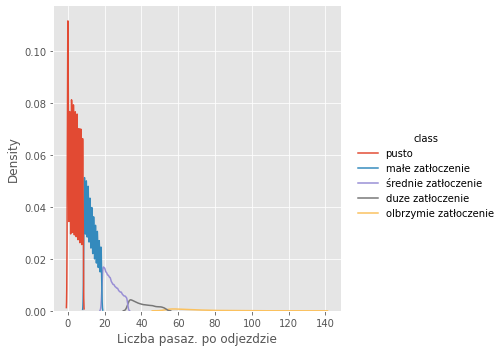

In [20]:
plt.figure(figsize=(10, 8))
ax = sns.displot(
    df,
    x='Liczba pasaz. po odjezdzie',
    hue='class',
    kind='kde'
)

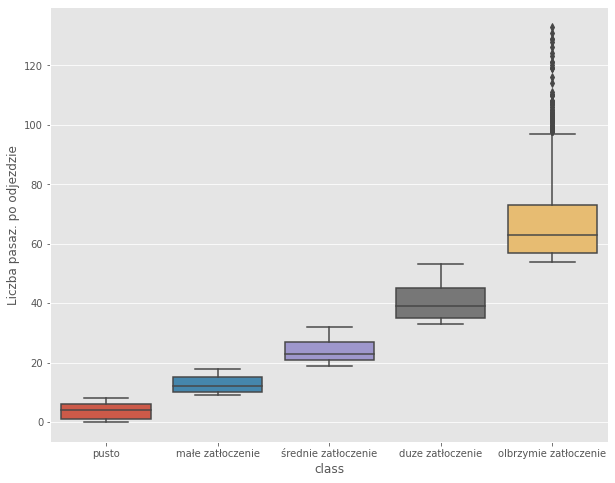

In [21]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(
    x='class',
    order=crowding,
    y='Liczba pasaz. po odjezdzie',
    data=df
)

In [122]:
def create_heatmap(df, corr):
    

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
dfheatmap = df['Liczba pasaz. po odjezdzie']

In [5]:
corr = df.corr()
corr

,Numer taborowy,Numer przystanku,Liczba pasaz. przed,Liczba wysiadających pasaz.,Liczba wsiadajacych pasaz.,Liczba pasaz. po odjezdzie,Godzina odjazdu,Godzina odjazdu przedział
Numer taborowy,1.000000,-0.002003,0.320958,0.124254,0.123192,0.321755,-0.002678,-0.002722
Numer przystanku,-0.002003,1.000000,-0.030895,0.013882,0.024542,-0.028010,-0.000627,-0.000607
Liczba pasaz. przed,0.320958,-0.030895,1.000000,0.374577,0.146987,0.944015,-0.049583,-0.049621
Liczba wysiadających pasaz.,0.124254,0.013882,0.374577,1.000000,0.146362,0.160806,-0.035205,-0.035178
Liczba wsiadajacych pasaz.,0.123192,0.024542,0.146987,0.146362,1.000000,0.370362,-0.049363,-0.049336
Liczba pasaz. po odjezdzie,0.321755,-0.028010,0.944015,0.160806,0.370362,1.000000,-0.053566,-0.053604
Godzina odjazdu,-0.002678,-0.000627,-0.049583,-0.035205,-0.049363,-0.053566,1.000000,0.999908
Godzina odjazdu przedział,-0.002722,-0.000607,-0.049621,-0.035178,-0.049336,-0.053604,0.999908,1.000000


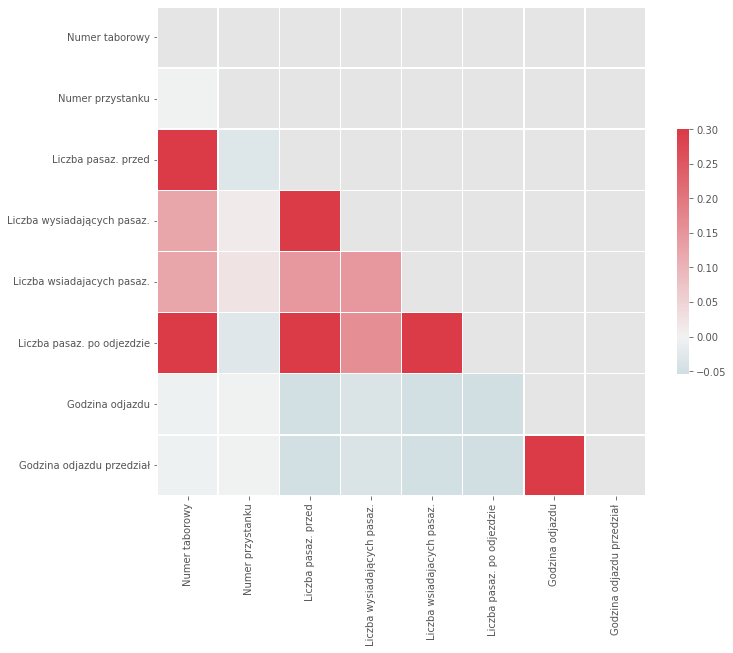

In [123]:
create_heatmap(df,corr)

# 8. Drzewa

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from matplotlib import pyplot as plt

In [41]:
def create_tree(features, label, __df, max_depth = 3):
    X_train = __df[features]
    y_train = __df[label]
    
    clf = DecisionTreeClassifier(
        random_state = RANDOM_SEED,
        max_depth = max_depth,
        criterion = 'gini'
    )
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    
    feature_importances = {
        'Feature': features,
        'Importance': clf.feature_importances_
    }
    
    feature_importances_df = pd.DataFrame.from_dict(feature_importances)
    print(feature_importances_df)
    
    cr = classification_report(
        y_train, 
        y_pred, 
        target_names=clf.classes_,
        zero_division=0
    )
    print(cr)
    
    cm = confusion_matrix(
        y_train, 
        y_pred, 
        labels=clf.classes_
    )
    
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=clf.classes_
    )
    disp.plot()
    
    plt.figure(figsize=(80, 60))
    plot_tree(
        clf, 
        filled = True,
        rounded = True,
        label = 'all',
        class_names = clf.classes_
    )
    return clf

In [56]:
df_tree = df_no_type.drop(columns=['Wariant linii','Nazwa przystanku', 'Numer przystanku', 'Rzeczywisty czas odjazdu', 'Rozkładowy czas odjazdu', 'Kurs', 'Oznaczenie brygady'], inplace= False)
df_tree.sample(5)

,Nr linii,Numer taborowy,Liczba pasaz. przed,Liczba wysiadających pasaz.,Liczba wsiadajacych pasaz.,Liczba pasaz. po odjezdzie,Godzina odjazdu,Godzina odjazdu przedział,class
100101,209,9233,1,0,0,1,22.383333,89,pusto
122709,256,9359,11,0,1,12,10.833333,43,małe zatłoczenie
49510,159,9531,8,0,1,9,7.116667,28,małe zatłoczenie
14861,123,9417,47,1,2,48,19.433333,77,duze zatłoczenie
159541,739,9352,15,2,0,13,23.550000,94,małe zatłoczenie


                       Feature  Importance
0                     Nr linii         0.0
1               Numer taborowy         0.0
2          Liczba pasaz. przed         0.0
3  Liczba wysiadających pasaz.         0.0
4   Liczba wsiadajacych pasaz.         0.0
5   Liczba pasaz. po odjezdzie         1.0
6              Godzina odjazdu         0.0
7    Godzina odjazdu przedział         0.0
                       precision    recall  f1-score   support

     duze zatłoczenie       1.00      1.00      1.00      8248
     małe zatłoczenie       1.00      1.00      1.00     48870
olbrzymie zatłoczenie       1.00      1.00      1.00      2374
                pusto       1.00      1.00      1.00     77347
  średnie zatłoczenie       1.00      1.00      1.00     22888

             accuracy                           1.00    159727
            macro avg       1.00      1.00      1.00    159727
         weighted avg       1.00      1.00      1.00    159727



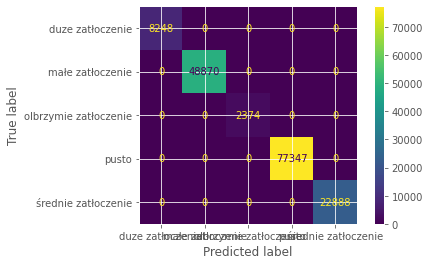

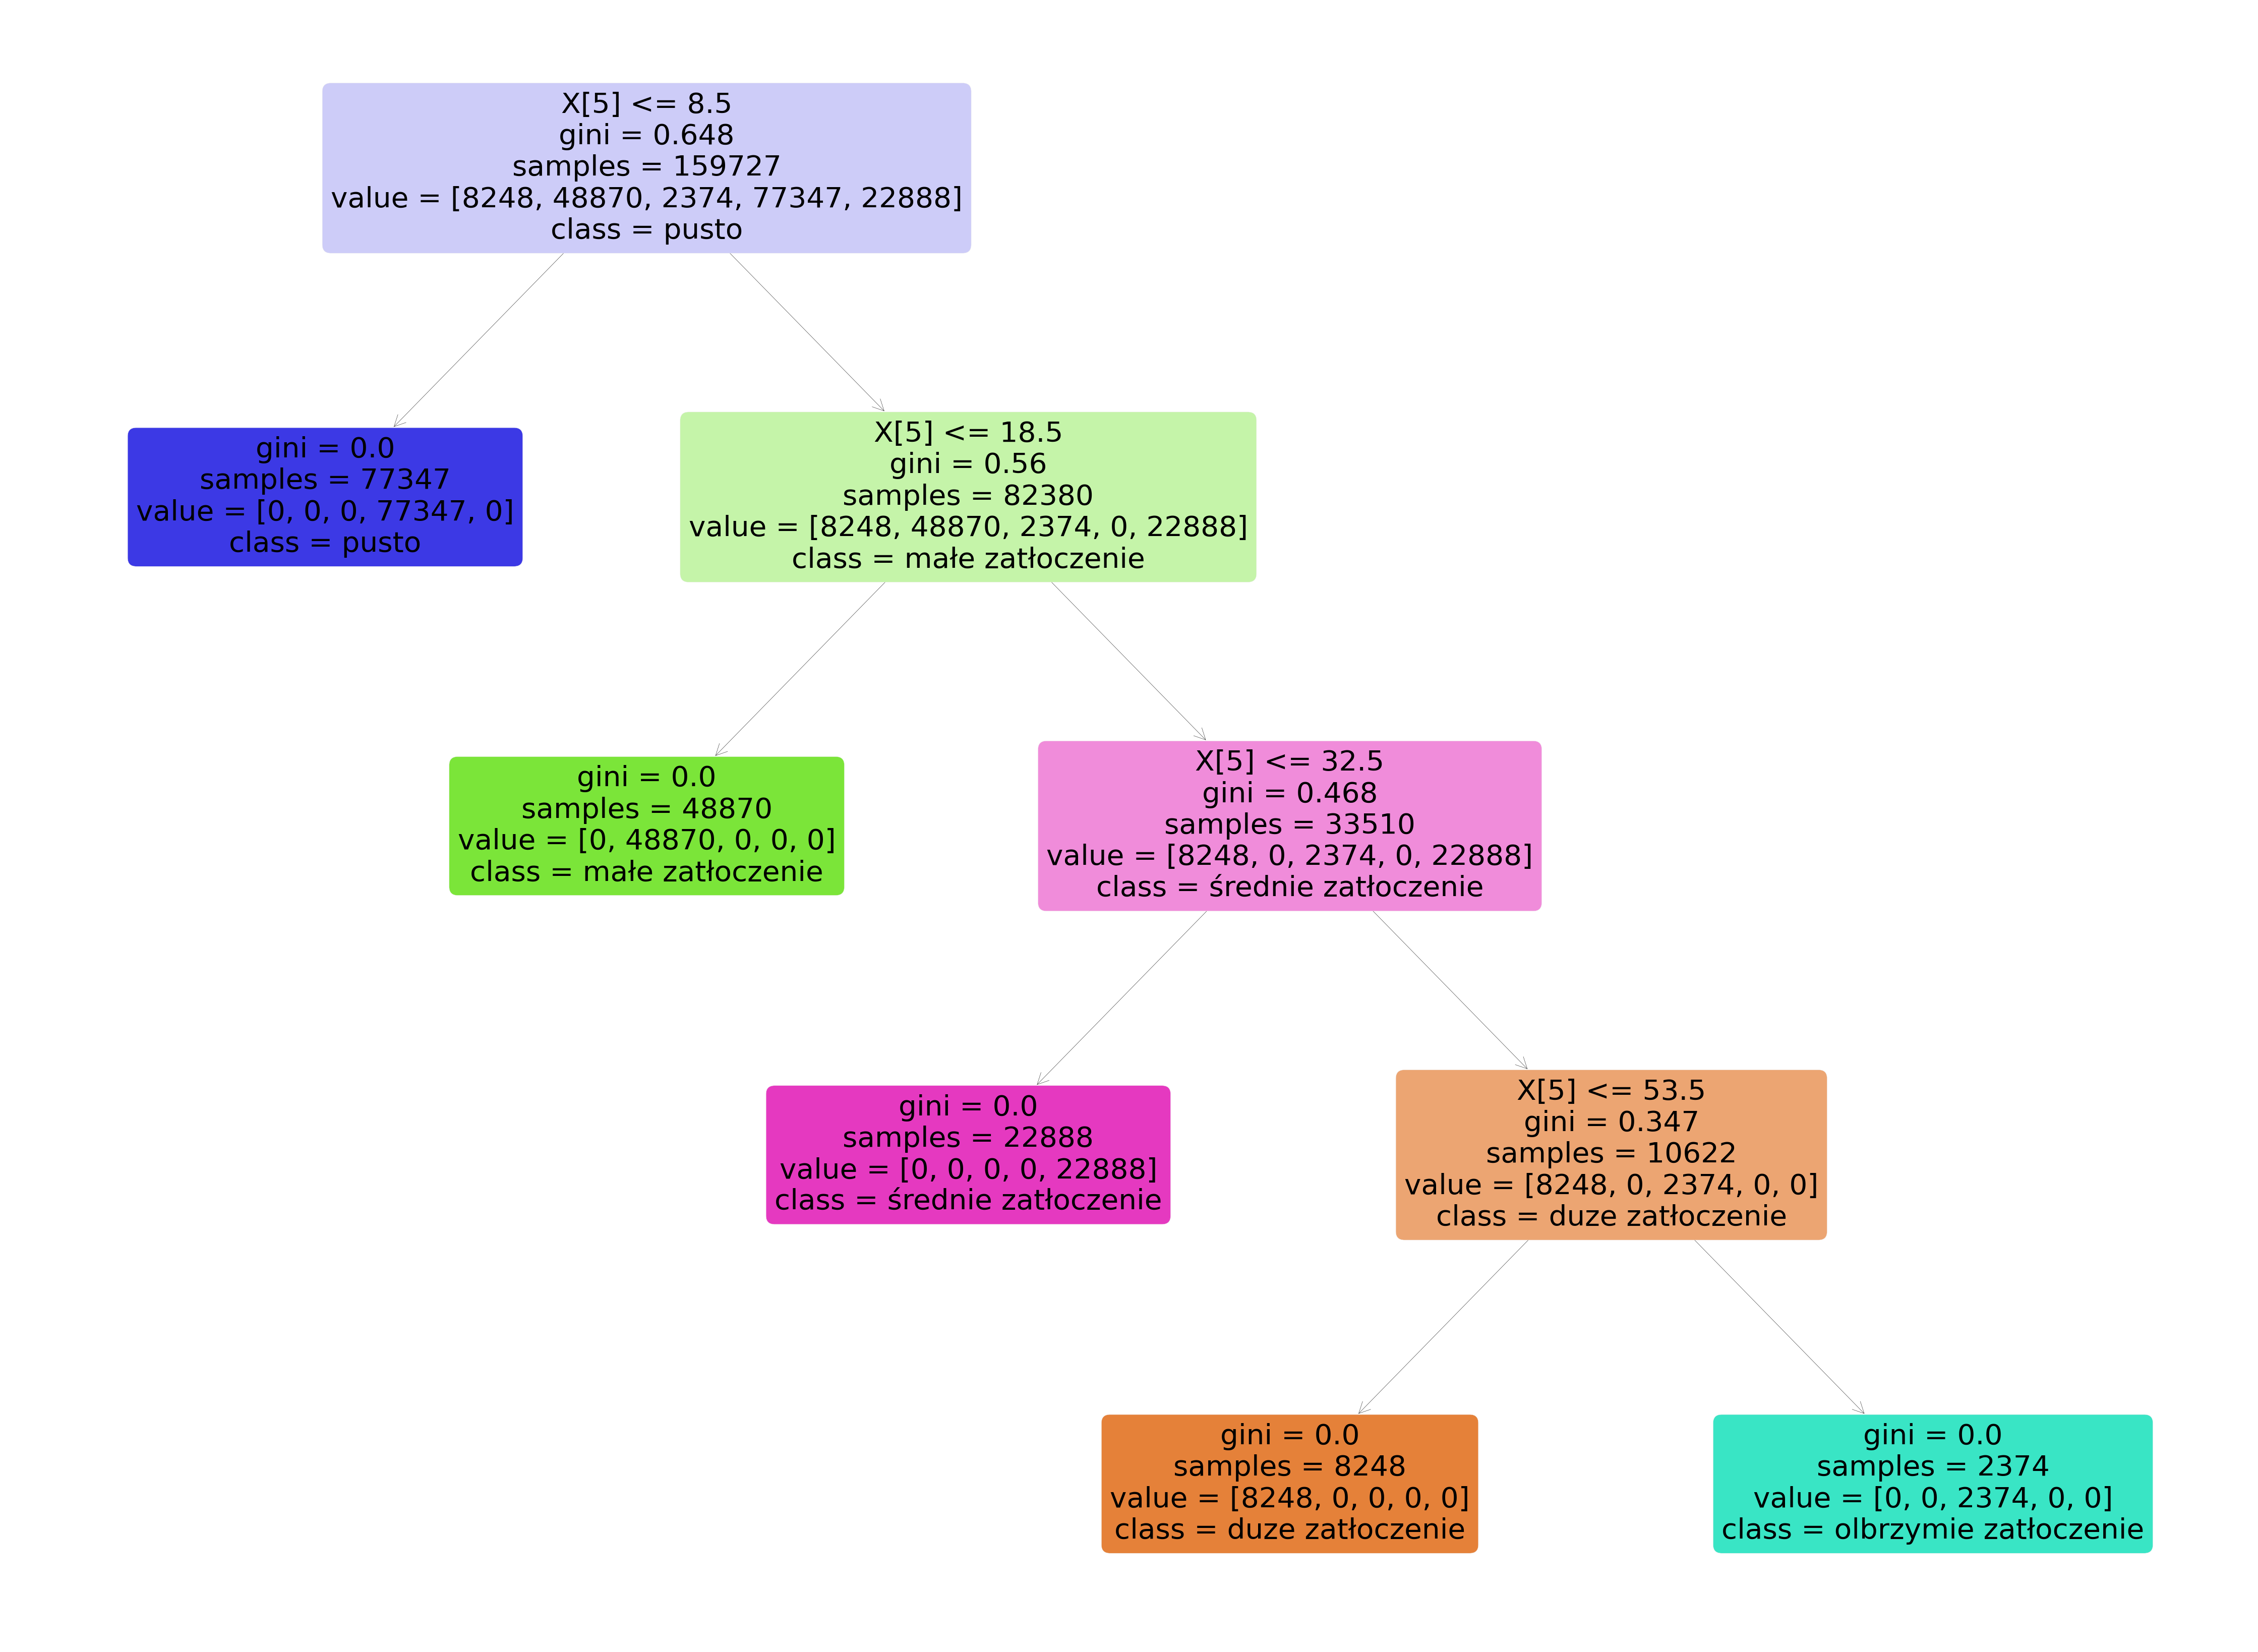

In [64]:
label = 'class'
features = df_tree.columns[:-1]

tree = create_tree(features, label, df_tree, max_depth=4)

# 9. PCA